# Donors choose data analysis

<h4><a id="about_data"></a></h4>

## Little History about Data Set

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

## Answers to What and Why Questions on Data Set

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


<a id="first_part"></a>
## Importing required libraries

In [1]:
# numpy for easy numerical computations
import numpy as np
# pandas for dataframes and filterings
import pandas as pd
# sqlite3 library for performing operations on sqlite file
import sqlite3
# matplotlib for plotting graphs
import matplotlib.pyplot as plt
# seaborn library for easy plotting
import seaborn as sbrn
# warnings library for specific settings
import warnings
# regularlanguage for regex operations
import re
# For loading precomputed models
import pickle
# For loading natural language processing tool-kit
import nltk
# For calculating mathematical terms
import math

# For loading files from google drive
from google.colab import drive
# For working with files in google drive
drive.mount('/content/drive')
# tqdm for tracking progress of loops
from tqdm import tqdm_notebook as tqdm
# For creating dictionary of words
from collections import Counter
# For creating BagOfWords Model
from sklearn.feature_extraction.text import CountVectorizer
# For creating TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
# For standardizing values
from sklearn.preprocessing import StandardScaler
# For merging sparse matrices along row direction
from scipy.sparse import hstack
# For merging sparse matrices along column direction
from scipy.sparse import vstack
# For calculating TSNE values
from sklearn.manifold import TSNE
# For calculating the accuracy score on cross validate data
from sklearn.metrics import accuracy_score
# For performing the k-fold cross validation
from sklearn.model_selection import cross_val_score
# For splitting the data set into test and train data
from sklearn import model_selection
# Support Vector classifier for classification
from sklearn.svm import SVC
# For reducing dimensions of data
from sklearn.decomposition import TruncatedSVD
# For using svm classifer - hinge loss function of sgd
from sklearn import linear_model
# For creating samples for making dataset balanced
from sklearn.utils import resample
# For shuffling the dataframes
from sklearn.utils import shuffle
# For calculating roc_curve parameters
from sklearn.metrics import roc_curve
# For calculating auc value
from sklearn.metrics import auc
# For displaying results in table format
from prettytable import PrettyTable
# For generating confusion matrix
from sklearn.metrics import confusion_matrix
# For using gridsearch cv to find best parameter
from sklearn.model_selection import GridSearchCV
# For performing min-max standardization to features
from sklearn.preprocessing import MinMaxScaler
# For calculating sentiment score of the text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

warnings.filterwarnings('ignore')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Reading and Storing Data

In [0]:
projectsData = pd.read_csv('drive/My Drive/train_data.csv');
resourcesData = pd.read_csv('drive/My Drive/resources.csv');

In [3]:
projectsData.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


In [4]:
projectsData.tail(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
109245,143653,p155633,cdbfd04aa041dc6739e9e576b1fb1478,Mrs.,NJ,2016-08-25 17:11:32,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",2016/2017 Beginning of the Year Basics,This is a great group of sharing and caring st...,"My students learn about special events, holida...",NaN,NaN,My students need giant comfy pillows in order ...,3,1
109246,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1
109247,128381,p191189,ca25d5573f2bd2660f7850a886395927,Ms.,VA,2016-06-29 09:17:01,Grades 6-8,"Applied Learning, Math & Science","College & Career Prep, Mathematics",Classroom Tech to Develop 21st Century Leaders,When was the last time that you used math? Pro...,"According to Forbes Magazine (2014), companies...",NaN,NaN,My students need opportunities to work with te...,0,1


In [5]:
resourcesData.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


In [6]:
resourcesData.tail(3)

,id,description,quantity,price
1541269,p031981,Black Electrical Tape (GIANT 3 PACK) Each Roll...,6,8.99
1541270,p031981,Flormoon DC Motor Mini Electric Motor 0.5-3V 1...,2,8.14
1541271,p031981,WAYLLSHINE 6PCS 2 x 1.5V AAA Battery Spring Cl...,2,7.39


### Helper functions and classes

In [0]:
def equalsBorder(numberOfEqualSigns):
    """
    This function prints passed number of equal signs
    """
    print("="* numberOfEqualSigns);

In [0]:
# Citation link: https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
def printStyle(text, style):
    "This function prints text with the style passed to it"
    print(style + text + color.END);

### Shapes of projects data and resources data

In [10]:
printStyle("Number of data points in projects data: {}".format(projectsData.shape[0]), color.BOLD);
printStyle("Number of attributes in projects data:{}".format(projectsData.shape[1]), color.BOLD);
equalsBorder(60);
printStyle("Number of data points in resources data: {}".format(resourcesData.shape[0]), color.BOLD);
printStyle("Number of attributes in resources data: {}".format(resourcesData.shape[1]), color.BOLD);

Number of data points in projects data: 109248
Number of attributes in projects data:17
Number of data points in resources data: 1541272
Number of attributes in resources data: 4


<a id="pre_processing_data"></a>
## Required modifications to data and Pre-Processing

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
def cleanCategories(subjectCategories):
    cleanedCategories = []
    for subjectCategory in tqdm(subjectCategories):
        tempCategory = ""
        for category in subjectCategory.split(","):
            if 'The' in category.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                category = category.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            category = category.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            tempCategory += category.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
            tempCategory = tempCategory.replace('&','_')
        cleanedCategories.append(tempCategory)
    return cleanedCategories

In [12]:
# projectDataWithCleanedCategories = pd.DataFrame(projectsData);
subjectCategories = list(projectsData.project_subject_categories);
cleanedCategories = cleanCategories(subjectCategories);
printStyle("Sample categories: ", color.BOLD);
equalsBorder(60);
print(subjectCategories[0:5]);
equalsBorder(60);
printStyle("Sample cleaned categories: ", color.BOLD);
equalsBorder(60);
print(cleanedCategories[0:5]);
projectsData['cleaned_categories'] = cleanedCategories;
projectsData.head(5)


Sample categories: 
['Literacy & Language', 'History & Civics, Health & Sports', 'Health & Sports', 'Literacy & Language, Math & Science', 'Math & Science']
Sample cleaned categories: 
['Literacy_Language ', 'History_Civics Health_Sports ', 'Health_Sports ', 'Literacy_Language Math_Science ', 'Math_Science ']


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


In [13]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesCounter = Counter()
for subjectCategory in projectsData.cleaned_categories.values:
    categoriesCounter.update(subjectCategory.split());
categoriesCounter

Counter({'AppliedLearning': 12135,
         'Care_Hunger': 1388,
         'Health_Sports': 14223,
         'History_Civics': 5914,
         'Literacy_Language': 52239,
         'Math_Science': 41421,
         'Music_Arts': 10293,
         'SpecialNeeds': 13642,
         'Warmth': 1388})

In [14]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesDictionary = dict(categoriesCounter);
sortedCategoriesDictionary = dict(sorted(categoriesDictionary.items(), key = lambda keyValue: keyValue[1]));
sortedCategoriesData = pd.DataFrame.from_dict(sortedCategoriesDictionary, orient='index');
sortedCategoriesData.columns = ['subject_categories'];
printStyle("Number of projects by Subject Categories: ", color.BOLD);
equalsBorder(60);
sortedCategoriesData

Number of projects by Subject Categories: 


,subject_categories
Warmth,1388
Care_Hunger,1388
History_Civics,5914
Music_Arts,10293
AppliedLearning,12135
SpecialNeeds,13642
Health_Sports,14223
Math_Science,41421
Literacy_Language,52239


In [15]:
subjectSubCategories = projectsData.project_subject_subcategories;
cleanedSubCategories = cleanCategories(subjectSubCategories);
printStyle("Sample subject sub categories: ", color.BOLD);
equalsBorder(70);
print(subjectSubCategories[0:5]);
equalsBorder(70);
printStyle("Sample cleaned subject sub categories: ", color.BOLD);
equalsBorder(70);
print(cleanedSubCategories[0:5]);
projectsData['cleaned_sub_categories'] = cleanedSubCategories;


Sample subject sub categories: 
0                       ESL, Literacy
1    Civics & Government, Team Sports
2      Health & Wellness, Team Sports
3               Literacy, Mathematics
4                         Mathematics
Name: project_subject_subcategories, dtype: object
Sample cleaned subject sub categories: 
['ESL Literacy ', 'Civics_Government TeamSports ', 'Health_Wellness TeamSports ', 'Literacy Mathematics ', 'Mathematics ']


In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
subjectsSubCategoriesCounter = Counter();
for subCategory in projectsData.cleaned_sub_categories:
    subjectsSubCategoriesCounter.update(subCategory.split());
subjectsSubCategoriesCounter

Counter({'AppliedSciences': 10816,
         'Care_Hunger': 1388,
         'CharacterEducation': 2065,
         'Civics_Government': 815,
         'College_CareerPrep': 2568,
         'CommunityService': 441,
         'ESL': 4367,
         'EarlyDevelopment': 4254,
         'Economics': 269,
         'EnvironmentalScience': 5591,
         'Extracurricular': 810,
         'FinancialLiteracy': 568,
         'ForeignLanguages': 890,
         'Gym_Fitness': 4509,
         'Health_LifeScience': 4235,
         'Health_Wellness': 10234,
         'History_Geography': 3171,
         'Literacy': 33700,
         'Literature_Writing': 22179,
         'Mathematics': 28074,
         'Music': 3145,
         'NutritionEducation': 1355,
         'Other': 2372,
         'ParentInvolvement': 677,
         'PerformingArts': 1961,
         'SocialSciences': 1920,
         'SpecialNeeds': 13642,
         'TeamSports': 2192,
         'VisualArts': 6278,
         'Warmth': 1388})

In [17]:
projectsData['project_essay'] = projectsData['project_essay_1'].map(str) + projectsData['project_essay_2'].map(str) + \
                                projectsData['project_essay_3'].map(str) + projectsData['project_essay_4'].map(str);
projectsData.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th..."
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...


In [18]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
priceAndQuantityData = resourcesData.groupby('id').agg({'price': 'sum', 'quantity': 'sum'}).reset_index();
priceAndQuantityData.head(5)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4
3,p000004,1113.69,98
4,p000005,485.99,8


In [19]:
projectsData.shape

(109248, 20)

In [20]:
projectsData = pd.merge(projectsData, priceAndQuantityData, on = 'id', how = 'left');
print(projectsData.shape);
projectsData.head(3)

(109248, 22)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22


In [21]:
projectsData[projectsData['id'] == 'p253737']

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23


In [22]:
priceAndQuantityData[priceAndQuantityData['id'] == 'p253737']

,id,price,quantity
253736,p253737,154.6,23


In [23]:
projectsData.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4


In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# All stopwords that are needed to be removed in the text
stopWords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]);
def preProcessingWithAndWithoutStopWords(texts):
    """
    This function takes list of texts and returns preprocessed list of texts one with
    stop words and one without stopwords.
    """
    # Variable for storing preprocessed text with stop words
    preProcessedTextsWithStopWords = [];
    # Variable for storing preprocessed text without stop words
    preProcessedTextsWithoutStopWords = [];
    
    # Looping over list of texts for performing pre processing
    for text in tqdm(texts, total = len(texts)):
        # Removing all links in the text
        text = re.sub(r"http\S+", "", text);

        # Removing all html tags in the text
        text = re.sub(r"<\w+/>", "", text);
        text = re.sub(r"<\w+>", "", text);
        
        # https://stackoverflow.com/a/47091490/4084039
        # Replacing all below words with adverbs
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        
        # Removing backslash symbols in text
        text = text.replace('\\r', ' ');
        text = text.replace('\\n', ' ');
        text = text.replace('\\"', ' ');
        
        # Removing all special characters of text
        text = re.sub(r"[^a-zA-Z0-9]+", " ", text);
        
        # Converting whole review text into lower case
        text = text.lower();
        
        # adding this preprocessed text without stopwords to list
        preProcessedTextsWithStopWords.append(text);
        
        # removing stop words from text
        textWithoutStopWords = ' '.join([word for word in text.split() if word not in stopWords]);
        # adding this preprocessed text without stopwords to list
        preProcessedTextsWithoutStopWords.append(textWithoutStopWords);

    return [preProcessedTextsWithStopWords, preProcessedTextsWithoutStopWords];

In [25]:
texts = [projectsData['project_essay'].values[0]]
preProcessedTextsWithStopWords, preProcessedTextsWithoutStopWords = preProcessingWithAndWithoutStopWords(texts);
print("Example project essay without pre-processing: ");
equalsBorder(70);
print(texts);
equalsBorder(70);
print("Example project essay with stop words and pre-processing: ");
equalsBorder(70);
print(preProcessedTextsWithStopWords);
equalsBorder(70);
print("Example project essay without stop words and pre-processing: ");
equalsBorder(70);
print(preProcessedTextsWithoutStopWords);


Example project essay without pre-processing: 
['My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\\r\

In [26]:
projectEssays = projectsData['project_essay'];
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(projectEssays);

In [27]:
preProcessedEssaysWithoutStopWords[0:3]

['students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvd players students able continue mastery english language even no one home able assist families students within level 1 proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch videos help child develop early reading skills parents not access dvd player opportunity check dvd 

In [28]:
projectTitles = projectsData['project_title'];
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(projectTitles);
preProcessedProjectTitlesWithoutStopWords[0:5]

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners',
 'interactive math tools']

In [29]:
projectsData['preprocessed_titles'] = preProcessedProjectTitlesWithoutStopWords;
projectsData['preprocessed_essays'] = preProcessedEssaysWithoutStopWords;
projectsData.shape

(109248, 24)

## Preparing data for classification and modelling

In [30]:
pd.DataFrame(projectsData.columns, columns = ['All features in projects data'])

,All features in projects data
0,Unnamed: 0
1,id
2,teacher_id
3,teacher_prefix
4,school_state
5,project_submitted_datetime
6,project_grade_category
7,project_subject_categories
8,project_subject_subcategories
9,project_title


### Useful features:
#### Here we will consider only below features for classification and we can ignore the other features

##### Categorical data:
1. <b>school_state</b> - categorical data
2. <b>project_grade_category</b> - categorical data
3. <b>cleaned_categories</b> - categorical data
4. <b>cleaned_sub_categories</b> - categorical data
5. <b>teacher_prefix</b> - categorical data

##### Text data:
1. <b>project_resource_summary</b> - text data
2. <b>project_title - text data</b>
3. <b>project_resource_summary</b> - text data

##### Numerical data:
1. <b>teacher_number_of_previously_posted_projects</b> - numerical data
2. <b>price</b> - numerical data
3. <b>quantity</b> - numerical data

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

<h3><font color='blue'>Splitting Data(Only training and test)</font></h3>

In [31]:
projectsData = projectsData.dropna(subset = ['teacher_prefix']);
projectsData.shape

(109245, 24)

In [32]:
classesData = projectsData['project_is_approved']
print(classesData.shape)

(109245,)


In [0]:
trainingData, testData, classesTraining, classesTest = model_selection.train_test_split(projectsData, classesData, test_size =  0.3, random_state = 0, stratify = classesData);
trainingData, crossValidateData, classesTraining, classesCrossValidate = model_selection.train_test_split(trainingData, classesTraining, test_size = 0.3, random_state = 0, stratify = classesTraining);

In [34]:
print("Shapes of splitted data: ");
equalsBorder(70);

print("testData shape: ", testData.shape);
print("classesTest: ", classesTest.shape);
print("trainingData shape: ", trainingData.shape);
print("classesTraining shape: ", classesTraining.shape);

Shapes of splitted data: 
testData shape:  (32774, 24)
classesTest:  (32774,)
trainingData shape:  (53529, 24)
classesTraining shape:  (53529,)


In [35]:
print("Number of negative points: ", trainingData[trainingData['project_is_approved'] == 0].shape);
print("Number of positive points: ", trainingData[trainingData['project_is_approved'] == 1].shape);

Number of negative points:  (8105, 24)
Number of positive points:  (45424, 24)


In [0]:
vectorizedFeatureNames = [];

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## Vectorizing categorical data

### 1. Vectorizing cleaned_categories(project_subject_categories cleaned) - One Hot Encoding

In [40]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesDictionary = dict(categoriesCounter);
sortedCategoriesDictionary = dict(sorted(categoriesDictionary.items(), key = lambda keyValue: keyValue[1]));
sortedCategoriesData = pd.DataFrame.from_dict(sortedCategoriesDictionary, orient='index');
sortedCategoriesData.columns = ['subject_categories'];
printStyle("Number of projects by Subject Categories: ", color.BOLD);
equalsBorder(60);
sortedCategoriesData

Number of projects by Subject Categories: 


,subject_categories
Warmth,1388
Care_Hunger,1388
History_Civics,5914
Music_Arts,10293
AppliedLearning,12135
SpecialNeeds,13642
Health_Sports,14223
Math_Science,41421
Literacy_Language,52239


In [0]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_categories
subjectsCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedCategoriesDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_categories values
subjectsCategoriesVectorizer.fit(trainingData['cleaned_categories'].values);
# Vectorizing categories using one-hot-encoding
categoriesVectors = subjectsCategoriesVectorizer.transform(trainingData['cleaned_categories'].values);

In [43]:
print("Features used in vectorizing categories: ");
equalsBorder(70);
print(subjectsCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", categoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(categoriesVectors[0:4])

Features used in vectorizing categories: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (53529, 9)
Sample vectors of categories: 
  (0, 3)	1
  (0, 7)	1
  (1, 7)	1
  (1, 8)	1
  (2, 6)	1
  (2, 7)	1
  (3, 7)	1


### 2. Vectorizing cleaned_sub_categories(project_subject_sub_categories cleaned) - One Hot Encoding

In [42]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
dictionarySubCategories = dict(subjectsSubCategoriesCounter);
sortedDictionarySubCategories = dict(sorted(dictionarySubCategories.items(), key = lambda keyValue: keyValue[1]));
sortedSubCategoriesData = pd.DataFrame.from_dict(sortedDictionarySubCategories, orient = 'index');
sortedSubCategoriesData.columns = ['subject_sub_categories']
printStyle("Number of projects sorted by subject sub categories: ", color.BOLD);
equalsBorder(70);
sortedSubCategoriesData

Number of projects sorted by subject sub categories: 


,subject_sub_categories
Economics,269
CommunityService,441
FinancialLiteracy,568
ParentInvolvement,677
Extracurricular,810
Civics_Government,815
ForeignLanguages,890
NutritionEducation,1355
Warmth,1388
Care_Hunger,1388


In [0]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_sub_categories
subjectsSubCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedDictionarySubCategories.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_sub_categories values
subjectsSubCategoriesVectorizer.fit(trainingData['cleaned_sub_categories'].values);
# Vectorizing sub categories using one-hot-encoding
subCategoriesVectors = subjectsSubCategoriesVectorizer.transform(trainingData['cleaned_sub_categories'].values);

In [45]:
print("Features used in vectorizing subject sub categories: ");
equalsBorder(70);
print(subjectsSubCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", subCategoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(subCategoriesVectors[0:4])

Features used in vectorizing subject sub categories: 
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (53529, 30)
Sample vectors of categories: 
  (0, 23)	1
  (0, 25)	1
  (1, 28)	1
  (1, 29)	1
  (2, 24)	1
  (2, 25)	1
  (3, 28)	1


### 3. Vectorizing teacher_prefix - One Hot Encoding

In [0]:
def giveCounter(data):
    counter = Counter();
    for dataValue in data:
        counter.update(str(dataValue).split());
    return counter

In [47]:
giveCounter(trainingData['teacher_prefix'].values)

Counter({'Dr.': 4, 'Mr.': 5206, 'Mrs.': 28216, 'Ms.': 18934, 'Teacher': 1169})

In [0]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [49]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:100]);

Features used in vectorizing teacher_prefix: 
['Ms.', 'Mrs.', 'Teacher', 'Mr.', 'Dr.']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (53529, 5)
Sample vectors of teacher_prefix: 
  (21, 2)	1


In [50]:
teacherPrefixes = [prefix.replace('.', '') for prefix in trainingData['teacher_prefix'].values];
teacherPrefixes[0:5]

['Ms', 'Ms', 'Mrs', 'Mrs', 'Mrs']

In [51]:
trainingData['teacher_prefix'] = teacherPrefixes;
trainingData.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity,preprocessed_titles,preprocessed_essays
66637,174395,p233512,c9e73f31af5ad4c7d3a140e81554da3b,Ms,GA,2017-01-05 09:22:33,Grades 3-5,"Math & Science, Music & The Arts","Applied Sciences, Visual Arts",STEAMing Up With Chromebooks!,I am a third grade teacher at an inner city sc...,"In the words of Benjamin Franklin, \""Tell me a...",NaN,NaN,My students need four Chromebooks to engage in...,1,1,Math_Science Music_Arts,AppliedSciences VisualArts,I am a third grade teacher at an inner city sc...,159.00,4,steaming chromebooks,third grade teacher inner city school students...
76424,11981,p088047,e1aa00913e0009364b5c7c3c4ab9a6f5,Ms,WA,2017-03-14 16:13:15,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",iPad for Autism Preschool Program!,The students in our Autism Preschool Program a...,Our class would love to integrate the iPad int...,NaN,NaN,My students need an iPad 2 to expand their lea...,9,1,Literacy_Language Math_Science,Literacy Mathematics,The students in our Autism Preschool Program a...,509.85,1,ipad autism preschool program,students autism preschool program wonderful gr...
34433,11994,p210041,a6c5d41f4e18aca1530159f7cee84084,Mrs,NC,2016-08-18 17:14:11,Grades 3-5,"Math & Science, Health & Sports","Applied Sciences, Health & Wellness",Active With Our Robots,"Benjamin Franklin once said, \""Tell me and I f...","Last year, I had the opportunity to learn codi...",NaN,NaN,"My students need robots, Kindle Fires, Kindle ...",25,1,Math_Science Health_Sports,AppliedSciences Health_Wellness,"Benjamin Franklin once said, \""Tell me and I f...",289.92,12,active robots,benjamin franklin said tell forget teach remem...


In [0]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [53]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:4]);

Features used in vectorizing teacher_prefix: 
['Ms', 'Mrs', 'Teacher', 'Mr', 'Dr']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (53529, 5)
Sample vectors of teacher_prefix: 
  (0, 0)	1
  (1, 0)	1
  (2, 1)	1
  (3, 1)	1


### 4. Vectorizing school_state - One Hot Encoding

In [0]:
schoolStateDictionary = dict(giveCounter(trainingData['school_state'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique school states
schoolStateVectorizer = CountVectorizer(vocabulary = list(schoolStateDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with school_state values
schoolStateVectorizer.fit(trainingData['school_state'].values);
# Vectorizing school_state using one-hot-encoding
schoolStateVectors = schoolStateVectorizer.transform(trainingData['school_state'].values);

In [55]:
print("Features used in vectorizing school_state: ");
equalsBorder(70);
print(schoolStateVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", schoolStateVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(schoolStateVectors[0:4]);

Features used in vectorizing school_state: 
['GA', 'WA', 'NC', 'MI', 'NV', 'KY', 'CA', 'CT', 'PA', 'SC', 'WV', 'CO', 'FL', 'AZ', 'MS', 'OH', 'LA', 'TX', 'NY', 'IN', 'MO', 'KS', 'IA', 'NJ', 'AR', 'MA', 'WI', 'OK', 'UT', 'MN', 'OR', 'DC', 'VA', 'AL', 'NM', 'TN', 'IL', 'HI', 'DE', 'MD', 'ID', 'SD', 'NH', 'NE', 'ME', 'MT', 'AK', 'ND', 'VT', 'WY', 'RI']
Shape of school_state matrix after vectorization(one-hot-encoding):  (53529, 51)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


### 5. Vectorizing project_grade_category - One Hot Encoding

In [56]:
giveCounter(trainingData['project_grade_category'])

Counter({'3-5': 18193,
         '6-8': 8300,
         '9-12': 5289,
         'Grades': 53529,
         'PreK-2': 21747})

In [57]:
cleanedGrades = []
for grade in trainingData['project_grade_category'].values:
    grade = grade.replace(' ', '');
    grade = grade.replace('-', 'to');
    cleanedGrades.append(grade);
cleanedGrades[0:4]

['Grades3to5', 'GradesPreKto2', 'Grades3to5', 'Grades3to5']

In [58]:
trainingData['project_grade_category'] = cleanedGrades
trainingData.head(4)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity,preprocessed_titles,preprocessed_essays
66637,174395,p233512,c9e73f31af5ad4c7d3a140e81554da3b,Ms,GA,2017-01-05 09:22:33,Grades3to5,"Math & Science, Music & The Arts","Applied Sciences, Visual Arts",STEAMing Up With Chromebooks!,I am a third grade teacher at an inner city sc...,"In the words of Benjamin Franklin, \""Tell me a...",NaN,NaN,My students need four Chromebooks to engage in...,1,1,Math_Science Music_Arts,AppliedSciences VisualArts,I am a third grade teacher at an inner city sc...,159.00,4,steaming chromebooks,third grade teacher inner city school students...
76424,11981,p088047,e1aa00913e0009364b5c7c3c4ab9a6f5,Ms,WA,2017-03-14 16:13:15,GradesPreKto2,"Literacy & Language, Math & Science","Literacy, Mathematics",iPad for Autism Preschool Program!,The students in our Autism Preschool Program a...,Our class would love to integrate the iPad int...,NaN,NaN,My students need an iPad 2 to expand their lea...,9,1,Literacy_Language Math_Science,Literacy Mathematics,The students in our Autism Preschool Program a...,509.85,1,ipad autism preschool program,students autism preschool program wonderful gr...
34433,11994,p210041,a6c5d41f4e18aca1530159f7cee84084,Mrs,NC,2016-08-18 17:14:11,Grades3to5,"Math & Science, Health & Sports","Applied Sciences, Health & Wellness",Active With Our Robots,"Benjamin Franklin once said, \""Tell me and I f...","Last year, I had the opportunity to learn codi...",NaN,NaN,"My students need robots, Kindle Fires, Kindle ...",25,1,Math_Science Health_Sports,AppliedSciences Health_Wellness,"Benjamin Franklin once said, \""Tell me and I f...",289.92,12,active robots,benjamin franklin said tell forget teach remem...
84559,145506,p030629,8c9462aaf17c6a5869fe54c62af8b23c,Mrs,MI,2016-11-18 22:22:10,Grades3to5,Math & Science,Mathematics,Flexible Seating for Flexible Learners,My class is composed of 33 geniuses. These stu...,I believe that an engaged learner is a success...,NaN,NaN,My students need flexible seating in order to ...,0,0,Math_Science,Mathematics,My class is composed of 33 geniuses. These stu...,190.24,17,flexible seating flexible learners,class composed 33 geniuses students passionate...


In [0]:
projectGradeDictionary = dict(giveCounter(trainingData['project_grade_category'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique project grade categories
projectGradeVectorizer = CountVectorizer(vocabulary = list(projectGradeDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with project_grade_category values
projectGradeVectorizer.fit(trainingData['project_grade_category'].values);
# Vectorizing project_grade_category using one-hot-encoding
projectGradeVectors = projectGradeVectorizer.transform(trainingData['project_grade_category'].values);

In [60]:
print("Features used in vectorizing project_grade_category: ");
equalsBorder(70);
print(projectGradeVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", projectGradeVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(projectGradeVectors[0:4]);

Features used in vectorizing project_grade_category: 
['Grades3to5', 'GradesPreKto2', 'Grades6to8', 'Grades9to12']
Shape of school_state matrix after vectorization(one-hot-encoding):  (53529, 4)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 0)	1
  (3, 0)	1


### Vectorizing numerical features

#### 1. Vectorizing price

In [0]:
# Standardizing the price data using StandardScaler(Uses mean and std for standardization)
priceScaler = MinMaxScaler();
priceScaler.fit(trainingData['price'].values.reshape(-1, 1));
priceStandardized = priceScaler.transform(trainingData['price'].values.reshape(-1, 1));

In [62]:
print("Shape of standardized matrix of prices: ", priceStandardized.shape);
equalsBorder(70);
print("Sample original prices: ");
equalsBorder(70);
print(trainingData['price'].values[0:5]);
print("Sample standardized prices: ");
equalsBorder(70);
print(priceStandardized[0:5]);

Shape of standardized matrix of prices:  (53529, 1)
Sample original prices: 
[159.   509.85 289.92 190.24 438.99]
Sample standardized prices: 
[[0.01583663]
 [0.05092745]
 [0.0289308 ]
 [0.01896115]
 [0.04384028]]


#### 2. Vectorizing quantity

In [0]:
# Standardizing the quantity data using StandardScaler(Uses mean and std for standardization)
quantityScaler = MinMaxScaler();
quantityScaler.fit(trainingData['quantity'].values.reshape(-1, 1));
quantityStandardized = quantityScaler.transform(trainingData['quantity'].values.reshape(-1, 1));

In [64]:
print("Shape of standardized matrix of quantities: ", quantityStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['quantity'].values[0:5]);
print("Sample standardized quantities: ");
equalsBorder(70);
print(quantityStandardized[0:5]);

Shape of standardized matrix of quantities:  (53529, 1)
Sample original quantities: 
[ 4  1 12 17  2]
Sample standardized quantities: 
[[0.00322928]
 [0.        ]
 [0.01184069]
 [0.01722282]
 [0.00107643]]


#### 3. Vectorizing teacher_number_of_previously_posted_projects

In [0]:
# Standardizing the teacher_number_of_previously_posted_projects data using StandardScaler(Uses mean and std for standardization)
previouslyPostedScaler = MinMaxScaler();
previouslyPostedScaler.fit(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
previouslyPostedStandardized = previouslyPostedScaler.transform(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

In [66]:
print("Shape of standardized matrix of teacher_number_of_previously_posted_projects: ", previouslyPostedStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['teacher_number_of_previously_posted_projects'].values[0:5]);
print("Sample standardized teacher_number_of_previously_posted_projects: ");
equalsBorder(70);
print(previouslyPostedStandardized[0:5]);

Shape of standardized matrix of teacher_number_of_previously_posted_projects:  (53529, 1)
Sample original quantities: 
[ 1  9 25  0  0]
Sample standardized teacher_number_of_previously_posted_projects: 
[[0.00221729]
 [0.01995565]
 [0.05543237]
 [0.        ]
 [0.        ]]


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<a id="vectorizing_features"></a>
## Vectorizing Text Data

In [67]:
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_essay']);
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_title']);

### Bag of Words

#### 1. Vectorizing project_essay

In [0]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project essays
bowEssayVectorizer = CountVectorizer(min_df = 10, max_features = 5000);
# Transforming the preprocessed essays to bag of words vectors
bowEssayModel = bowEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [69]:
print("Some of the Features used in vectorizing preprocessed essays: ");
equalsBorder(70);
print(bowEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed essay matrix after vectorization: ", bowEssayModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed essay: ");
equalsBorder(70);
print(bowEssayModel[0])

Some of the Features used in vectorizing preprocessed essays: 
['worrying', 'worse', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'xylophone', 'xylophones', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youth', 'youtube', 'zero', 'zest', 'zip', 'zone', 'zoo']
Shape of preprocessed essay matrix after vectorization:  (53529, 5000)
Sample bag-of-words vector of preprocessed essay: 
  (0, 4549)	1
  (0, 2057)	2
  (0, 4482)	1
  (0, 2398)	1
  (0, 817)	1
  (0, 3956)	2
  (0, 4366)	9
  (0, 2284)	1
  (0, 3868)	2
  (0, 138)	1
  (0, 2657)	1
  (0, 4273)	1
  (0, 244)	1
  (0, 148)	3
  (0, 596)	1
  (0, 3038)	3
  (0, 2451)	3
  (0, 2136)	2
  (0, 2631)	2
  (0, 1693)	4
  (0, 2800)	1
  (0, 2838)	1
  (0, 4201)	1
  (0, 2676)	2
  (0, 3631)	1
  :	:
  (0, 4678)	1
  (0, 874)	1
  (0, 1643)	1
  (0, 2061)	1
  (0, 4839)	1
  (0,

#### 2. Vectorizing project_title

In [0]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project titles
bowTitleVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed project titles to bag of words vectors
bowTitleModel = bowTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [71]:
print("Some of the Features used in vectorizing preprocessed titles: ");
equalsBorder(70);
print(bowTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after vectorization: ", bowTitleModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed title: ");
equalsBorder(70);
print(bowTitleModel[0])

Some of the Features used in vectorizing preprocessed titles: 
['wobble', 'wobbles', 'wobbling', 'wobbly', 'women', 'wonder', 'wonderful', 'wonders', 'word', 'words', 'work', 'workers', 'working', 'works', 'worksheets', 'workshop', 'world', 'worlds', 'worms', 'worth', 'would', 'wow', 'wrestling', 'write', 'writer', 'writers', 'writing', 'written', 'xylophone', 'ye', 'year', 'yearbook', 'years', 'yes', 'yoga', 'yogis', 'young', 'youngest', 'youth', 'zone']
Shape of preprocessed title matrix after vectorization:  (53529, 2097)
Sample bag-of-words vector of preprocessed title: 
  (0, 1772)	1
  (0, 329)	1


### Tf-Idf Vectorization

#### 1. Vectorizing project_essay

In [0]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project essays
tfIdfEssayVectorizer = TfidfVectorizer(min_df = 10, max_features = 5000);
# Transforming the preprocessed project essays to tf-idf vectors
tfIdfEssayModel = tfIdfEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [73]:
print("Some of the Features used in tf-idf vectorizing preprocessed essays: ");
equalsBorder(70);
print(tfIdfEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfEssayModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed essay: ");
equalsBorder(70);
print(tfIdfEssayModel[0])

Some of the Features used in tf-idf vectorizing preprocessed essays: 
['worrying', 'worse', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'xylophone', 'xylophones', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youth', 'youtube', 'zero', 'zest', 'zip', 'zone', 'zoo']
Shape of preprocessed title matrix after tf-idf vectorization:  (53529, 5000)
Sample Tf-Idf vector of preprocessed essay: 
  (0, 3015)	0.018051068352693163
  (0, 3270)	0.08620378214515413
  (0, 2329)	0.0868099712148866
  (0, 3548)	0.03989961379391851
  (0, 819)	0.03249360548155223
  (0, 3665)	0.04281871407058692
  (0, 4578)	0.0351796237345842
  (0, 4457)	0.06890520374374785
  (0, 183)	0.08712124261849882
  (0, 4527)	0.06478904776131371
  (0, 1554)	0.05814510281984422
  (0, 1547)	0.08338171723911092
  (0, 2030)	0.04214570871240633
  (0

#### 2. Vectorizing project_title

In [0]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project titles
tfIdfTitleVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project titles to tf-idf vectors
tfIdfTitleModel = tfIdfTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [75]:
print("Some of the Features used in tf-idf vectorizing preprocessed titles: ");
equalsBorder(70);
print(tfIdfTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfTitleModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed title: ");
equalsBorder(70);
print(tfIdfTitleModel[0])

Some of the Features used in tf-idf vectorizing preprocessed titles: 
['wobble', 'wobbles', 'wobbling', 'wobbly', 'women', 'wonder', 'wonderful', 'wonders', 'word', 'words', 'work', 'workers', 'working', 'works', 'worksheets', 'workshop', 'world', 'worlds', 'worms', 'worth', 'would', 'wow', 'wrestling', 'write', 'writer', 'writers', 'writing', 'written', 'xylophone', 'ye', 'year', 'yearbook', 'years', 'yes', 'yoga', 'yogis', 'young', 'youngest', 'youth', 'zone']
Shape of preprocessed title matrix after tf-idf vectorization:  (53529, 2097)
Sample Tf-Idf vector of preprocessed title: 
  (0, 329)	0.5001682594739306
  (0, 1772)	0.865928237335415


### Average Word2Vector Vectorization

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# We should have glove_vectors file for creating below model
with open('drive/My Drive/glove_vectors', 'rb') as f:
    gloveModel = pickle.load(f)
    gloveWords =  set(gloveModel.keys())

In [77]:
print("Glove vector of sample word: ");
equalsBorder(70);
print(gloveModel['technology']);
equalsBorder(70);
print("Shape of glove vector: ", gloveModel['technology'].shape);

Glove vector of sample word: 
[-0.26078   -0.36898   -0.022831   0.21666    0.16672   -0.20268
 -3.1219     0.33057    0.71512    0.28874    0.074368  -0.033203
  0.23783    0.21052    0.076562   0.13007   -0.31706   -0.45888
 -0.45463   -0.13191    0.49761    0.072704   0.16811    0.18846
 -0.16688   -0.21973    0.08575   -0.19577   -0.2101    -0.32436
 -0.56336    0.077996  -0.22758   -0.66569    0.14824    0.038945
  0.50881   -0.1352     0.49966   -0.4401    -0.022335  -0.22744
  0.22086    0.21865    0.36647    0.30495   -0.16565    0.038759
  0.28108   -0.2167     0.12453    0.65401    0.34584   -0.2557
 -0.046363  -0.31111   -0.020936  -0.17122   -0.77114    0.29289
 -0.14625    0.39541   -0.078938   0.051127   0.15076    0.085126
  0.183     -0.06755    0.26312    0.0087276  0.0066415  0.37033
  0.03496   -0.12627   -0.052626  -0.34897    0.14672    0.14799
 -0.21821   -0.042785   0.2661    -1.1105     0.31789    0.27278
  0.054468  -0.27458    0.42732   -0.44101   -0.19302   -

In [0]:
def getWord2VecVectors(texts):
    word2VecTextsVectors = [];
    for preProcessedText in tqdm(texts):
        word2VecTextVector = np.zeros(300);
        numberOfWordsInText = 0;
        for word in preProcessedText.split():
            if word in gloveWords:
                word2VecTextVector += gloveModel[word];
                numberOfWordsInText += 1;
        if numberOfWordsInText != 0:
            word2VecTextVector = word2VecTextVector / numberOfWordsInText;
        word2VecTextsVectors.append(word2VecTextVector);
    return word2VecTextsVectors;

#### 1. Vectorizing project_essay

In [79]:
word2VecEssaysVectors = getWord2VecVectors(preProcessedEssaysWithoutStopWords);

In [80]:
print("Shape of Word2Vec vectorization matrix of essays: {},{}".format(len(word2VecEssaysVectors), len(word2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample essay: ");
equalsBorder(70);
print(word2VecEssaysVectors[0]);

Shape of Word2Vec vectorization matrix of essays: 53529,300
Sample essay: 
third grade teacher inner city school students identified risk achieving grade level standards also active boys need interactive hands learning experiences many may sound like quite feat honor charged providing educational learning experiences need therefore work tenaciously ensure receive high quality education considering teachers 21st century countless resources available help us achieve goal students eager learn however truly embrace experiences allow use technology truly goal facilitate opportunities maximize students academic progress support partners education like students reach stars words benjamin franklin tell forget teach remember involve learn quote truly describes students students active need interactive technology help grow become career college ready educator atlanta public schools endeavor ensure student ready leaders future support mission atlanta public school caring culture trust collaborati

#### 2. Vectorizing project_title

In [81]:
word2VecTitlesVectors = getWord2VecVectors(preProcessedProjectTitlesWithoutStopWords);

In [82]:
print("Shape of Word2Vec vectorization matrix of project titles: {}, {}".format(len(word2VecTitlesVectors), len(word2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample title: ");
equalsBorder(70);
print(word2VecTitlesVectors[0]);

Shape of Word2Vec vectorization matrix of project titles: 53529, 300
Sample title: 
steaming chromebooks
Word2Vec vector of sample title: 
[ 1.86585500e-01 -2.06677000e-01  1.69029400e-01 -9.09015000e-01
  6.89250000e-02  1.34635000e-01 -6.30880500e-01  9.68625000e-02
  3.24390000e-01 -5.98255000e-01  1.93035000e-01  2.73000000e-02
  6.40480000e-01 -2.96480000e-01 -1.43084500e-01  1.17845000e-01
 -2.51900000e-01 -1.28365500e-01 -3.59500950e-01  1.56255000e-01
 -4.87780000e-01 -2.21435000e-01  2.48296500e-01  1.12586500e-01
 -8.73900000e-02  1.46641000e-01  4.00420000e-01 -2.13070000e-02
 -1.16589000e-01 -3.88050000e-01 -5.23230000e-01  4.19790000e-01
  3.94555000e-01 -3.37480000e-02  6.45310000e-01 -6.50940000e-02
  5.29050000e-02  1.40730000e-01 -2.24210000e-01 -7.35465000e-02
  2.65775000e-01 -1.08428000e-01  3.86240000e-01 -4.73719500e-01
 -4.64885000e-01  2.58855000e-01 -3.70475000e-01  1.48070000e-01
 -5.75000000e-04  5.89500000e-02  2.41550000e-01 -1.22307500e-01
  1.43700000e-01

### Tf-Idf Weighted Word2Vec Vectorization

#### 1. Vectorizing project_essay

In [0]:
# Initializing tfidf vectorizer
tfIdfEssayTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed essays using tfidf vectorizer initialized above 
tfIdfEssayTempVectorizer.fit(preProcessedEssaysWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfEssayDictionary = dict(zip(tfIdfEssayTempVectorizer.get_feature_names(), list(tfIdfEssayTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfEssayWords = set(tfIdfEssayTempVectorizer.get_feature_names());

In [84]:
# Creating list to save tf-idf weighted vectors of essays
tfIdfWeightedWord2VecEssaysVectors = [];
# Iterating over each essay
for essay in tqdm(preProcessedEssaysWithoutStopWords):
    # Sum of tf-idf values of all words in a particular essay
    cumulativeSumTfIdfWeightOfEssay = 0;
    # Tf-Idf weighted word2vec vector of a particular essay
    tfIdfWeightedWord2VecEssayVector = np.zeros(300);
    # Splitting essay into list of words
    splittedEssay = essay.split();
    # Iterating over each word
    for word in splittedEssay:
        # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
        if (word in gloveWords) and (word in tfIdfEssayWords):
            # Tf-Idf value of particular word in essay
            tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfEssay != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
    # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
    tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);

In [85]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: {}, {}".format(len(tfIdfWeightedWord2VecEssaysVectors), len(tfIdfWeightedWord2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample Essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample essay: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecEssaysVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: 53529, 300
Sample Essay: 
third grade teacher inner city school students identified risk achieving grade level standards also active boys need interactive hands learning experiences many may sound like quite feat honor charged providing educational learning experiences need therefore work tenaciously ensure receive high quality education considering teachers 21st century countless resources available help us achieve goal students eager learn however truly embrace experiences allow use technology truly goal facilitate opportunities maximize students academic progress support partners education like students reach stars words benjamin franklin tell forget teach remember involve learn quote truly describes students students active need interactive technology help grow become career college ready educator atlanta public schools endeavor ensure student ready leaders future support mission atlanta public school caring 

#### 2. Vectorizing project_title

In [0]:
# Initializing tfidf vectorizer
tfIdfTitleTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed titles using tfidf vectorizer initialized above 
tfIdfTitleTempVectorizer.fit(preProcessedProjectTitlesWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfTitleDictionary = dict(zip(tfIdfTitleTempVectorizer.get_feature_names(), list(tfIdfTitleTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfTitleWords = set(tfIdfTitleTempVectorizer.get_feature_names());

In [87]:
# Creating list to save tf-idf weighted vectors of project titles
tfIdfWeightedWord2VecTitlesVectors = [];
# Iterating over each title
for title in tqdm(preProcessedProjectTitlesWithoutStopWords):
    # Sum of tf-idf values of all words in a particular project title
    cumulativeSumTfIdfWeightOfTitle = 0;
    # Tf-Idf weighted word2vec vector of a particular project title
    tfIdfWeightedWord2VecTitleVector = np.zeros(300);
    # Splitting title into list of words
    splittedTitle = title.split();
    # Iterating over each word
    for word in splittedTitle:
        # Checking if word is in glove words and set of words used by tfIdf title vectorizer
        if (word in gloveWords) and (word in tfIdfTitleWords):
            # Tf-Idf value of particular word in title
            tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfTitle != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
    # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);

In [88]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: {}, {}".format(len(tfIdfWeightedWord2VecTitlesVectors), len(tfIdfWeightedWord2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample Title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample title: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecTitlesVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: 53529, 300
Sample Title: 
steaming chromebooks
Tf-Idf Weighted Word2Vec vector of sample title: 
[ 1.23127012e-01 -1.26576136e-01  1.22900151e-01 -9.04520968e-01
  1.56239341e-01  3.44128678e-02 -7.78678727e-01  1.00572720e-01
  2.85222176e-01 -7.02731536e-01  1.04655050e-01 -9.30549132e-02
  5.77443070e-01 -1.78197402e-01 -9.17383449e-02  3.83058564e-02
 -2.83177498e-01 -1.38251701e-01 -2.61149243e-01  1.60411678e-01
 -4.46285507e-01 -2.18785703e-01  3.19401402e-01  7.35623190e-02
 -3.57882861e-02  2.07040414e-01  3.20659970e-01 -2.41541573e-02
 -1.41526660e-01 -3.92863982e-01 -3.56167678e-01  3.46091625e-01
  3.33050887e-01 -6.77436043e-02  5.69857922e-01 -7.40742993e-02
  4.94591739e-02  1.34360443e-01 -2.08415961e-01 -6.07368357e-02
  3.66337163e-01 -9.39560660e-02  2.55788575e-01 -3.71281678e-01
 -4.54559570e-01  2.21565379e-01 -2.37676826e-01  5.58091450e-02
 -1.79092619e-01  1.54078361e-01  2.56348042e-01 

<h3><font color="green">Method for vectorizing unknown essays using our training data tf-idf weighted model</font></h3>

In [0]:
def getAvgTfIdfEssayVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of essays
    tfIdfWeightedWord2VecEssaysVectors = [];
    # Iterating over each essay
    for essay in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular essay
        cumulativeSumTfIdfWeightOfEssay = 0;
        # Tf-Idf weighted word2vec vector of a particular essay
        tfIdfWeightedWord2VecEssayVector = np.zeros(300);
        # Splitting essay into list of words
        splittedEssay = essay.split();
        # Iterating over each word
        for word in splittedEssay:
            # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
            if (word in gloveWords) and (word in tfIdfEssayWords):
                # Tf-Idf value of particular word in essay
                tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfEssay != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
        # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
        tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);
    return tfIdfWeightedWord2VecEssaysVectors;

<h3><font color="green">Method for vectorizing unknown titles using our training data tf-idf weighted model</font></h3>

In [0]:
def getAvgTfIdfTitleVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors = [];
    # Iterating over each title
    for title in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular project title
        cumulativeSumTfIdfWeightOfTitle = 0;
        # Tf-Idf weighted word2vec vector of a particular project title
        tfIdfWeightedWord2VecTitleVector = np.zeros(300);
        # Splitting title into list of words
        splittedTitle = title.split();
        # Iterating over each word
        for word in splittedTitle:
            # Checking if word is in glove words and set of words used by tfIdf title vectorizer
            if (word in gloveWords) and (word in tfIdfTitleWords):
                # Tf-Idf value of particular word in title
                tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfTitle != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
        # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
        tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);
    return tfIdfWeightedWord2VecTitlesVectors;

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
numberOfPoints = previouslyPostedStandardized.shape[0];
# Categorical data
categoriesVectorsSub = categoriesVectors[0:numberOfPoints];
subCategoriesVectorsSub = subCategoriesVectors[0:numberOfPoints];
teacherPrefixVectorsSub = teacherPrefixVectors[0:numberOfPoints];
schoolStateVectorsSub = schoolStateVectors[0:numberOfPoints];
projectGradeVectorsSub = projectGradeVectors[0:numberOfPoints];

# Text data
bowEssayModelSub = bowEssayModel[0:numberOfPoints];
bowTitleModelSub = bowTitleModel[0:numberOfPoints];
tfIdfEssayModelSub = tfIdfEssayModel[0:numberOfPoints];
tfIdfTitleModelSub = tfIdfTitleModel[0:numberOfPoints];

# Numerical data
priceStandardizedSub = priceStandardized[0:numberOfPoints];
quantityStandardizedSub = quantityStandardized[0:numberOfPoints];
previouslyPostedStandardizedSub = previouslyPostedStandardized[0:numberOfPoints];

# Classes
classesTrainingSub = classesTraining;

In [0]:
supportVectorMachineResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - alpha', 'AUC', 'Data']);
supportVectorMachineResultsDataFrame

,Vectorizer,Model,Hyper Parameter - alpha,AUC,Data


<h3><font color="blue">Preparing cross validate data for analysis</font></h3>

In [0]:
# Test data categorical features transformation 
categoriesTransformedCrossValidateData = subjectsCategoriesVectorizer.transform(crossValidateData['cleaned_categories']);
subCategoriesTransformedCrossValidateData = subjectsSubCategoriesVectorizer.transform(crossValidateData['cleaned_sub_categories']);
teacherPrefixTransformedCrossValidateData = teacherPrefixVectorizer.transform(crossValidateData['teacher_prefix']);
schoolStateTransformedCrossValidateData = schoolStateVectorizer.transform(crossValidateData['school_state']);
projectGradeTransformedCrossValidateData = projectGradeVectorizer.transform(crossValidateData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_title'])[1];
bowEssayTransformedCrossValidateData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedCrossValidateData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedCrossValidateData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedCrossValidateData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
avgWord2VecEssayTransformedCrossValidateData = getWord2VecVectors(preProcessedEssaysTemp);
avgWord2VecTitleTransformedCrossValidateData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedWord2VecEssayTransformedCrossValidateData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedWord2VecTitleTransformedCrossValidateData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);


# Test data numerical features transformation
priceTransformedCrossValidateData = priceScaler.transform(crossValidateData['price'].values.reshape(-1, 1));
quantityTransformedCrossValidateData = quantityScaler.transform(crossValidateData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedCrossValidateData = previouslyPostedScaler.transform(crossValidateData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<h3><font color="blue">Preparing Test data for analysis</font></h3>

In [0]:
# Test data categorical features transformation 
categoriesTransformedTestData = subjectsCategoriesVectorizer.transform(testData['cleaned_categories']);
subCategoriesTransformedTestData = subjectsSubCategoriesVectorizer.transform(testData['cleaned_sub_categories']);
teacherPrefixTransformedTestData = teacherPrefixVectorizer.transform(testData['teacher_prefix']);
schoolStateTransformedTestData = schoolStateVectorizer.transform(testData['school_state']);
projectGradeTransformedTestData = projectGradeVectorizer.transform(testData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(testData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(testData['project_title'])[1];
bowEssayTransformedTestData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedTestData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedTestData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedTestData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
avgWord2VecEssayTransformedTestData = getWord2VecVectors(preProcessedEssaysTemp);
avgWord2VecTitleTransformedTestData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedWord2VecEssayTransformedTestData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedWord2VecTitleTransformedTestData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);

# Test data numerical features transformation
priceTransformedTestData = priceScaler.transform(testData['price'].values.reshape(-1, 1));
quantityTransformedTestData = quantityScaler.transform(testData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedTestData = previouslyPostedScaler.transform(testData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<a id="classification_on_balanced_data_using_support_vector_machine"></a>
<h2><font color="green">Classification using original data support vector machine(All vectorized models in one loop)</font></h2>

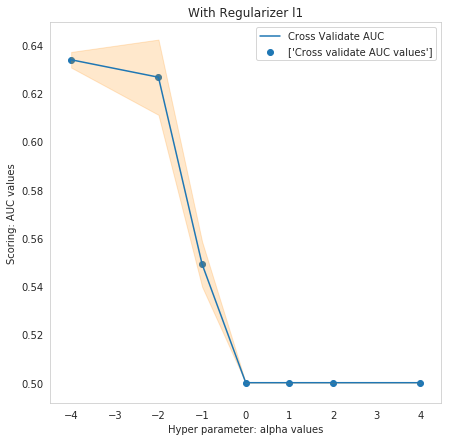

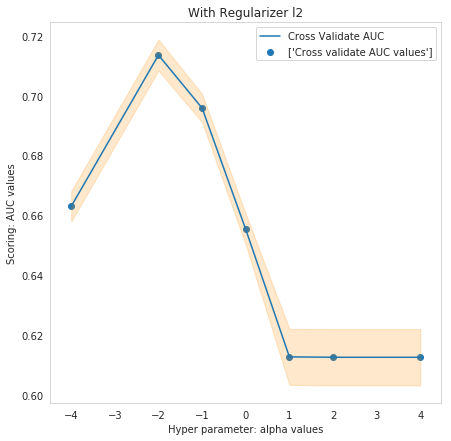

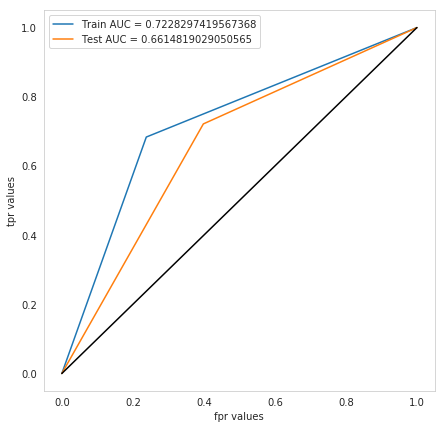

Results of analysis using Bag of words vectorized text features merged with other features using support vector machine classifier: 
Optimal Alpha value:  0.01
Optimal Regularizer:  l2
AUC value of test data:  0.6614819029050565
Confusion Matrix : 


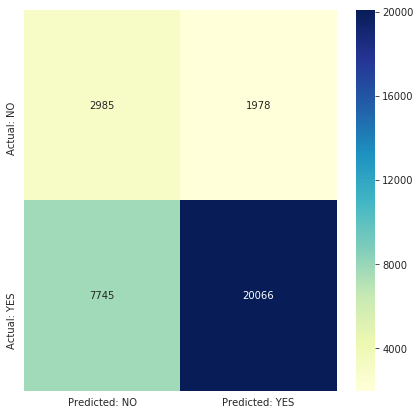

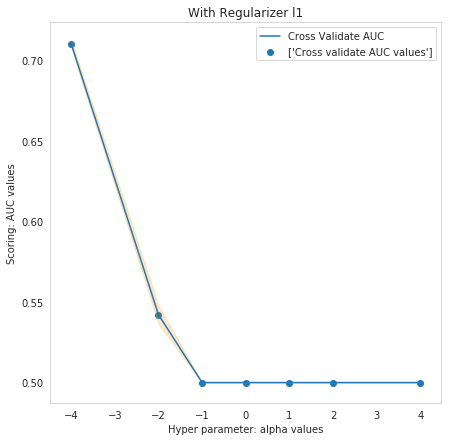

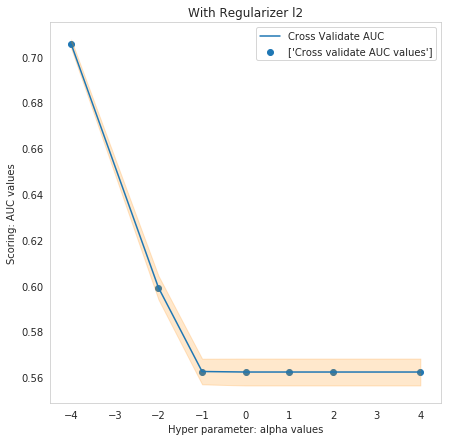

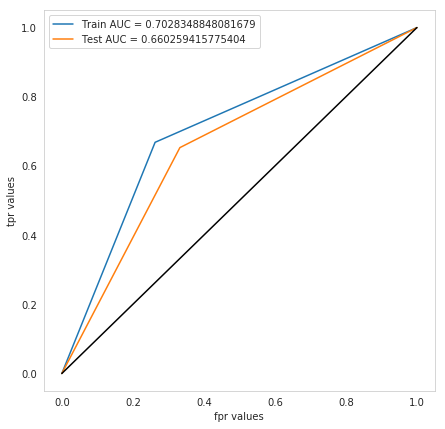

Results of analysis using Tf-Idf vectorized text features merged with other features using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.660259415775404
Confusion Matrix : 


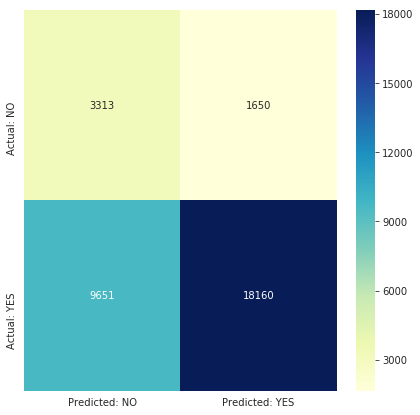

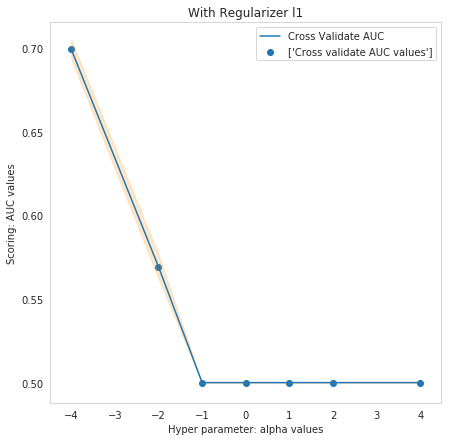

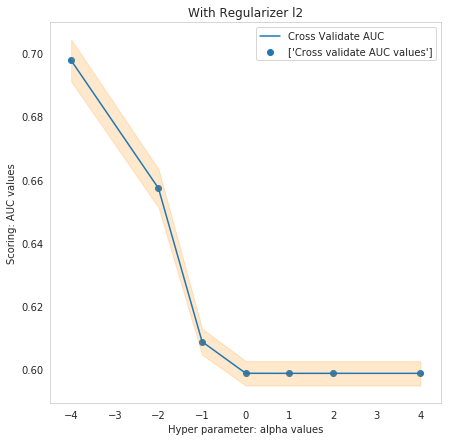

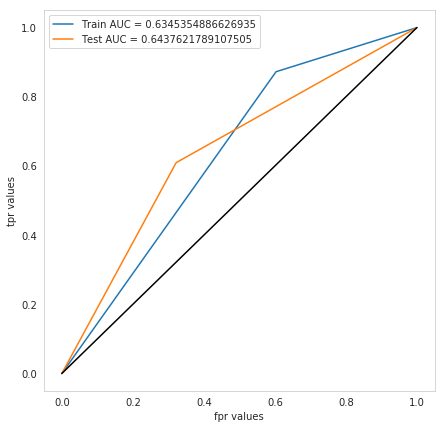

Results of analysis using Average Word2Vector vectorized text features merged with other features using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.6437621789107505
Confusion Matrix : 


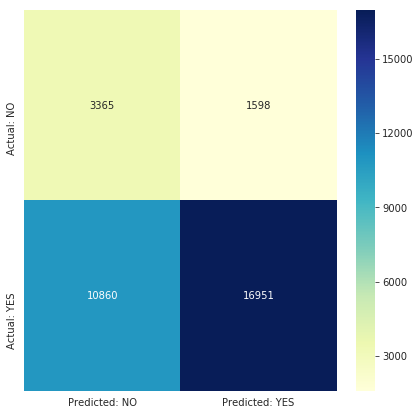

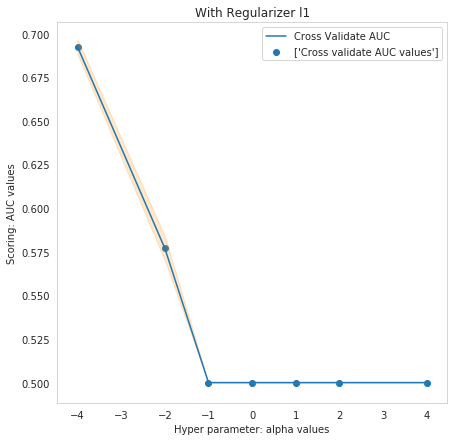

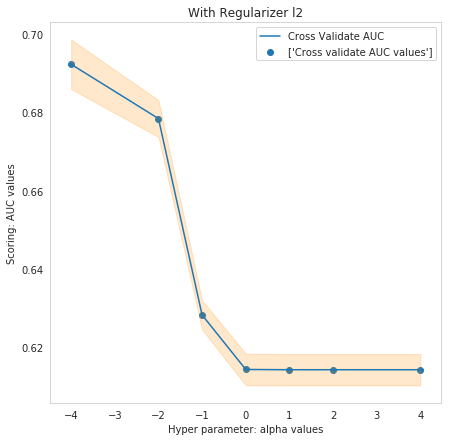

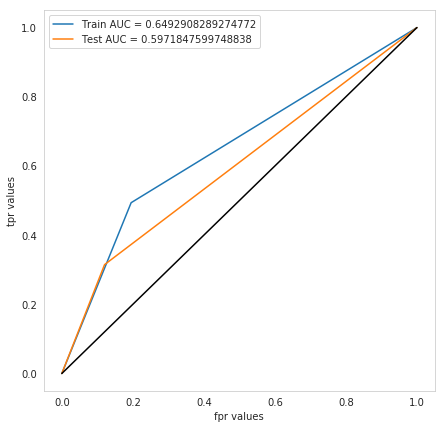

Results of analysis using Tf-Idf Weighted Word2Vector vectorized text features merged with other features using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.5971847599748838
Confusion Matrix : 


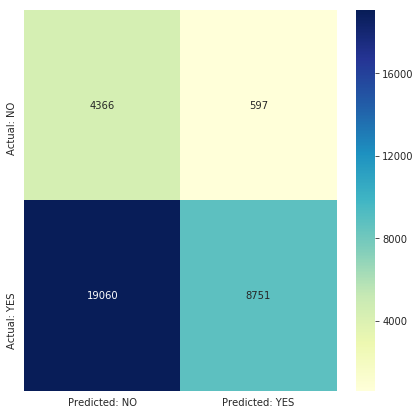

In [0]:
techniques = ['Bag of words', 'Tf-Idf', 'Average Word2Vector', 'Tf-Idf Weighted Word2Vector'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     bowTitleModelSub,\
                                     bowEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 bowTitleTransformedCrossValidateData,\
                                 bowEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 bowTitleTransformedTestData,\
                                 bowEssayTransformedTestData));
    elif(index == 1):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfTitleModelSub,\
                                     tfIdfEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 tfIdfTitleTransformedCrossValidateData,\
                                 tfIdfEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfTitleTransformedTestData,\
                                 tfIdfEssayTransformedTestData));
    elif(index == 2):
        trainingMergedData = hstack((trainingMergedData,\
                                     word2VecTitlesVectors,\
                                     word2VecEssaysVectors));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 avgWord2VecTitleTransformedCrossValidateData,\
                                 avgWord2VecEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 avgWord2VecTitleTransformedTestData,\
                                 avgWord2VecEssayTransformedTestData));
    elif(index == 3):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfWeightedWord2VecTitlesVectors,\
                                     tfIdfWeightedWord2VecEssaysVectors));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 tfIdfWeightedWord2VecTitleTransformedCrossValidateData,\
                                 tfIdfWeightedWord2VecEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfWeightedWord2VecTitleTransformedTestData,\
                                 tfIdfWeightedWord2VecEssayTransformedTestData));
    
    svmClassifier = linear_model.SGDClassifier(loss = 'hinge', class_weight = 'balanced');
    tunedParameters = {'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 10000], 'penalty': ['l1', 'l2']};
    classifier = GridSearchCV(svmClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_alpha'].data[:, None], classifier.cv_results_['param_penalty'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['alpha', 'penalty', 'mts', 'stdts']);
    testScoresDataFrame
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    testScoresDataFrame['logAlphaValues'] = [math.log10(x) for x in testScoresDataFrame['alpha']];
    
    plt.plot(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'], label = "Cross Validate AUC");
    plt.scatter(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'], label = ['Cross validate AUC values']);
    plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['logAlphaValues'].values, np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'].values - testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['stdts'].values, dtype = float),\
                           np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'].values + testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
    plt.xlabel('Hyper parameter: alpha values');
    plt.ylabel('Scoring: AUC values');
    plt.title("With Regularizer l1");
    plt.grid();
    plt.legend();
    plt.show();
    
    plt.plot(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'], label = "Cross Validate AUC");
    plt.scatter(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'], label = ['Cross validate AUC values']);
    plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['logAlphaValues'].values, np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'].values - testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['stdts'].values, dtype = float),\
                           np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'].values + testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
    plt.xlabel('Hyper parameter: alpha values');
    plt.ylabel('Scoring: AUC values');
    plt.title("With Regularizer l2");
    plt.grid();
    plt.legend();
    plt.show();
    
    optimalHypParamValue = classifier.best_params_['alpha'];
    optimalHypParam2Value = classifier.best_params_['penalty'];
    svmClassifier = linear_model.SGDClassifier(loss = 'hinge', class_weight = 'balanced', alpha = optimalHypParamValue, penalty = optimalHypParam2Value);
    svmClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = svmClassifier.predict(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining);
    predScoresTest = svmClassifier.predict(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest);
    
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();
    
    areaUnderRocValueTest = auc(fprTest, tprTest);
    
    print("Results of analysis using {} vectorized text features merged with other features using support vector machine classifier: ".format(technique));
    print("Optimal Alpha value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Regularizer: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = svmClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="YlGnBu");
    plt.show();
    # Adding results to results dataframe
    supportVectorMachineResultsDataFrame = supportVectorMachineResultsDataFrame.append({'Vectorizer': technique, 'Model': 'SVM(SGD - hinge loss)', 'Hyper Parameter - alpha': optimalHypParamValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [0]:
projectsData.shape

(109248, 24)

<h3><font color='blue'>Calculating number of words of  title and essay</font></h3>

In [0]:
number_of_words_in_title = [len(title.split()) for title in projectsData['preprocessed_titles'].values]
number_of_words_in_essay = [len(essay.split()) for essay in projectsData['preprocessed_essays'].values]
projectsData['number_of_words_in_title'] = number_of_words_in_title;
projectsData['number_of_words_in_essay'] = number_of_words_in_essay;

<h3><font color='blue'>Calculating sentiment score of each essay</font></h3>

In [0]:
sentimentAnalyzer = SentimentIntensityAnalyzer();
positiveSentimentScores = [];
negativeSentimentScores = [];
neutralSentimentScores = [];
compoundSentimentScores = [];
for projectEssay in tqdm(projectsData['preprocessed_essays'].values):
  sentimentScore = sentimentAnalyzer.polarity_scores(projectEssay);
  positiveSentimentScores.append(sentimentScore['pos']);
  negativeSentimentScores.append(sentimentScore['neg']);
  neutralSentimentScores.append(sentimentScore['neu']);
  compoundSentimentScores.append(sentimentScore['compound']);
print(len(positiveSentimentScores), len(negativeSentimentScores), len(neutralSentimentScores), len(compoundSentimentScores));
print(positiveSentimentScores[0:5])


109245 109245 109245 109245
[0.154, 0.305, 0.23, 0.256, 0.151]


In [0]:
projectsData['positive_sentiment_score'] = positiveSentimentScores;
projectsData['negative_sentiment_score'] = negativeSentimentScores;
projectsData['neutral_sentiment_score'] = neutralSentimentScores;
projectsData['compound_sentiment_score'] = compoundSentimentScores;
projectsData.shape

(109245, 30)

<h3><font color='blue'>Splitting Data(Only training and test)</font></h3>

In [0]:
projectsData = projectsData.dropna(subset = ['teacher_prefix']);
projectsData.shape

(109245, 30)

In [0]:
classesData = projectsData['project_is_approved']
print(classesData.shape)

(109245,)


In [0]:
trainingData, testData, classesTraining, classesTest = model_selection.train_test_split(projectsData, classesData, test_size =  0.3, random_state = 0, stratify = classesData);
trainingData, crossValidateData, classesTraining, classesCrossValidate = model_selection.train_test_split(trainingData, classesTraining, test_size = 0.3, random_state = 0, stratify = classesTraining);

In [0]:
print("Shapes of splitted data: ");
equalsBorder(70);

print("testData shape: ", testData.shape);
print("classesTest: ", classesTest.shape);
print("trainingData shape: ", trainingData.shape);
print("classesTraining shape: ", classesTraining.shape);

Shapes of splitted data: 
testData shape:  (32774, 30)
classesTest:  (32774,)
trainingData shape:  (53529, 30)
classesTraining shape:  (53529,)


In [0]:
print("Number of negative points: ", trainingData[trainingData['project_is_approved'] == 0].shape);
print("Number of positive points: ", trainingData[trainingData['project_is_approved'] == 1].shape);

Number of negative points:  (8105, 30)
Number of positive points:  (45424, 30)


In [0]:
vectorizedFeatureNames = [];

## Vectorizing  Data  Containing Set5 Features

## Vectorizing categorical data

### 1. Vectorizing cleaned_categories(project_subject_categories cleaned) - One Hot Encoding

In [0]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_categories
subjectsCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedCategoriesDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_categories values
subjectsCategoriesVectorizer.fit(trainingData['cleaned_categories'].values);
# Vectorizing categories using one-hot-encoding
categoriesVectors = subjectsCategoriesVectorizer.transform(trainingData['cleaned_categories'].values);

In [0]:
print("Features used in vectorizing categories: ");
equalsBorder(70);
print(subjectsCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", categoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(categoriesVectors[0:4])

Features used in vectorizing categories: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (53529, 9)
Sample vectors of categories: 
  (0, 3)	1
  (0, 7)	1
  (1, 7)	1
  (1, 8)	1
  (2, 6)	1
  (2, 7)	1
  (3, 7)	1


### 2. Vectorizing cleaned_sub_categories(project_subject_sub_categories cleaned) - One Hot Encoding

In [0]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_sub_categories
subjectsSubCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedDictionarySubCategories.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_sub_categories values
subjectsSubCategoriesVectorizer.fit(trainingData['cleaned_sub_categories'].values);
# Vectorizing sub categories using one-hot-encoding
subCategoriesVectors = subjectsSubCategoriesVectorizer.transform(trainingData['cleaned_sub_categories'].values);

In [0]:
print("Features used in vectorizing subject sub categories: ");
equalsBorder(70);
print(subjectsSubCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", subCategoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(subCategoriesVectors[0:4])

Features used in vectorizing subject sub categories: 
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (53529, 30)
Sample vectors of categories: 
  (0, 23)	1
  (0, 25)	1
  (1, 28)	1
  (1, 29)	1
  (2, 24)	1
  (2, 25)	1
  (3, 28)	1


### 3. Vectorizing teacher_prefix - One Hot Encoding

In [0]:
def giveCounter(data):
    counter = Counter();
    for dataValue in data:
        counter.update(str(dataValue).split());
    return counter

In [0]:
giveCounter(trainingData['teacher_prefix'].values)

Counter({'Dr.': 4, 'Mr.': 5206, 'Mrs.': 28216, 'Ms.': 18934, 'Teacher': 1169})

In [0]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [0]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:100]);

Features used in vectorizing teacher_prefix: 
['Ms.', 'Mrs.', 'Teacher', 'Mr.', 'Dr.']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (53529, 5)
Sample vectors of teacher_prefix: 
  (21, 2)	1


In [0]:
teacherPrefixes = [prefix.replace('.', '') for prefix in trainingData['teacher_prefix'].values];
teacherPrefixes[0:5]

['Ms', 'Ms', 'Mrs', 'Mrs', 'Mrs']

In [0]:
trainingData['teacher_prefix'] = teacherPrefixes;
trainingData.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity,preprocessed_titles,preprocessed_essays,number_of_words_in_title,number_of_words_in_essay,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score,compound_sentiment_score
66637,174395,p233512,c9e73f31af5ad4c7d3a140e81554da3b,Ms,GA,2017-01-05 09:22:33,Grades 3-5,"Math & Science, Music & The Arts","Applied Sciences, Visual Arts",STEAMing Up With Chromebooks!,I am a third grade teacher at an inner city sc...,"In the words of Benjamin Franklin, \""Tell me a...",NaN,NaN,My students need four Chromebooks to engage in...,1,1,Math_Science Music_Arts,AppliedSciences VisualArts,I am a third grade teacher at an inner city sc...,159.00,4,steaming chromebooks,third grade teacher inner city school students...,2,167,0.390,0.036,0.573,0.9970
76424,11981,p088047,e1aa00913e0009364b5c7c3c4ab9a6f5,Ms,WA,2017-03-14 16:13:15,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",iPad for Autism Preschool Program!,The students in our Autism Preschool Program a...,Our class would love to integrate the iPad int...,NaN,NaN,My students need an iPad 2 to expand their lea...,9,1,Literacy_Language Math_Science,Literacy Mathematics,The students in our Autism Preschool Program a...,509.85,1,ipad autism preschool program,students autism preschool program wonderful gr...,4,139,0.301,0.031,0.668,0.9917
34433,11994,p210041,a6c5d41f4e18aca1530159f7cee84084,Mrs,NC,2016-08-18 17:14:11,Grades 3-5,"Math & Science, Health & Sports","Applied Sciences, Health & Wellness",Active With Our Robots,"Benjamin Franklin once said, \""Tell me and I f...","Last year, I had the opportunity to learn codi...",NaN,NaN,"My students need robots, Kindle Fires, Kindle ...",25,1,Math_Science Health_Sports,AppliedSciences Health_Wellness,"Benjamin Franklin once said, \""Tell me and I f...",289.92,12,active robots,benjamin franklin said tell forget teach remem...,2,210,0.232,0.047,0.720,0.9924


In [0]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [0]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:4]);

Features used in vectorizing teacher_prefix: 
['Ms', 'Mrs', 'Teacher', 'Mr', 'Dr']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (53529, 5)
Sample vectors of teacher_prefix: 
  (0, 0)	1
  (1, 0)	1
  (2, 1)	1
  (3, 1)	1


### 4. Vectorizing school_state - One Hot Encoding

In [0]:
schoolStateDictionary = dict(giveCounter(trainingData['school_state'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique school states
schoolStateVectorizer = CountVectorizer(vocabulary = list(schoolStateDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with school_state values
schoolStateVectorizer.fit(trainingData['school_state'].values);
# Vectorizing school_state using one-hot-encoding
schoolStateVectors = schoolStateVectorizer.transform(trainingData['school_state'].values);

In [0]:
print("Features used in vectorizing school_state: ");
equalsBorder(70);
print(schoolStateVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", schoolStateVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(schoolStateVectors[0:4]);

Features used in vectorizing school_state: 
['GA', 'WA', 'NC', 'MI', 'NV', 'KY', 'CA', 'CT', 'PA', 'SC', 'WV', 'CO', 'FL', 'AZ', 'MS', 'OH', 'LA', 'TX', 'NY', 'IN', 'MO', 'KS', 'IA', 'NJ', 'AR', 'MA', 'WI', 'OK', 'UT', 'MN', 'OR', 'DC', 'VA', 'AL', 'NM', 'TN', 'IL', 'HI', 'DE', 'MD', 'ID', 'SD', 'NH', 'NE', 'ME', 'MT', 'AK', 'ND', 'VT', 'WY', 'RI']
Shape of school_state matrix after vectorization(one-hot-encoding):  (53529, 51)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


### 5. Vectorizing project_grade_category - One Hot Encoding

In [0]:
giveCounter(trainingData['project_grade_category'])

Counter({'3-5': 18193,
         '6-8': 8300,
         '9-12': 5289,
         'Grades': 53529,
         'PreK-2': 21747})

In [0]:
cleanedGrades = []
for grade in trainingData['project_grade_category'].values:
    grade = grade.replace(' ', '');
    grade = grade.replace('-', 'to');
    cleanedGrades.append(grade);
cleanedGrades[0:4]

['Grades3to5', 'GradesPreKto2', 'Grades3to5', 'Grades3to5']

In [0]:
trainingData['project_grade_category'] = cleanedGrades
trainingData.head(4)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,cleaned_categories,cleaned_sub_categories,project_essay,price,quantity,preprocessed_titles,preprocessed_essays,number_of_words_in_title,number_of_words_in_essay,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score,compound_sentiment_score
66637,174395,p233512,c9e73f31af5ad4c7d3a140e81554da3b,Ms,GA,2017-01-05 09:22:33,Grades3to5,"Math & Science, Music & The Arts","Applied Sciences, Visual Arts",STEAMing Up With Chromebooks!,I am a third grade teacher at an inner city sc...,"In the words of Benjamin Franklin, \""Tell me a...",NaN,NaN,My students need four Chromebooks to engage in...,1,1,Math_Science Music_Arts,AppliedSciences VisualArts,I am a third grade teacher at an inner city sc...,159.00,4,steaming chromebooks,third grade teacher inner city school students...,2,167,0.390,0.036,0.573,0.9970
76424,11981,p088047,e1aa00913e0009364b5c7c3c4ab9a6f5,Ms,WA,2017-03-14 16:13:15,GradesPreKto2,"Literacy & Language, Math & Science","Literacy, Mathematics",iPad for Autism Preschool Program!,The students in our Autism Preschool Program a...,Our class would love to integrate the iPad int...,NaN,NaN,My students need an iPad 2 to expand their lea...,9,1,Literacy_Language Math_Science,Literacy Mathematics,The students in our Autism Preschool Program a...,509.85,1,ipad autism preschool program,students autism preschool program wonderful gr...,4,139,0.301,0.031,0.668,0.9917
34433,11994,p210041,a6c5d41f4e18aca1530159f7cee84084,Mrs,NC,2016-08-18 17:14:11,Grades3to5,"Math & Science, Health & Sports","Applied Sciences, Health & Wellness",Active With Our Robots,"Benjamin Franklin once said, \""Tell me and I f...","Last year, I had the opportunity to learn codi...",NaN,NaN,"My students need robots, Kindle Fires, Kindle ...",25,1,Math_Science Health_Sports,AppliedSciences Health_Wellness,"Benjamin Franklin once said, \""Tell me and I f...",289.92,12,active robots,benjamin franklin said tell forget teach remem...,2,210,0.232,0.047,0.720,0.9924
84559,145506,p030629,8c9462aaf17c6a5869fe54c62af8b23c,Mrs,MI,2016-11-18 22:22:10,Grades3to5,Math & Science,Mathematics,Flexible Seating for Flexible Learners,My class is composed of 33 geniuses. These stu...,I believe that an engaged learner is a success...,NaN,NaN,My students need flexible seating in order to ...,0,0,Math_Science,Mathematics,My class is composed of 33 geniuses. These stu...,190.24,17,flexible seating flexible learners,class composed 33 geniuses students passionate...,4,97,0.451,0.016,0.532,0.9948


In [0]:
projectGradeDictionary = dict(giveCounter(trainingData['project_grade_category'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique project grade categories
projectGradeVectorizer = CountVectorizer(vocabulary = list(projectGradeDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with project_grade_category values
projectGradeVectorizer.fit(trainingData['project_grade_category'].values);
# Vectorizing project_grade_category using one-hot-encoding
projectGradeVectors = projectGradeVectorizer.transform(trainingData['project_grade_category'].values);

In [0]:
print("Features used in vectorizing project_grade_category: ");
equalsBorder(70);
print(projectGradeVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", projectGradeVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(projectGradeVectors[0:4]);

Features used in vectorizing project_grade_category: 
['Grades3to5', 'GradesPreKto2', 'Grades6to8', 'Grades9to12']
Shape of school_state matrix after vectorization(one-hot-encoding):  (53529, 4)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 0)	1
  (3, 0)	1


### Tf-Idf Vectorization

#### 1. Vectorizing project_essay

In [0]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project essays
tfIdfEssayVectorizer = TfidfVectorizer(min_df = 10, max_features = 5000);
# Transforming the preprocessed project essays to tf-idf vectors
tfIdfEssayModel = tfIdfEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [0]:
print("Some of the Features used in tf-idf vectorizing preprocessed essays: ");
equalsBorder(70);
print(tfIdfEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfEssayModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed essay: ");
equalsBorder(70);
print(tfIdfEssayModel[0])

Some of the Features used in tf-idf vectorizing preprocessed essays: 
['worrying', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'xylophones', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youngsters', 'youth', 'youtube', 'zero', 'zest', 'zip', 'zone', 'zones', 'zoo']
Shape of preprocessed title matrix after tf-idf vectorization:  (109248, 5000)
Sample Tf-Idf vector of preprocessed essay: 
  (0, 3013)	0.015965240695453155
  (0, 1488)	0.10227077629951559
  (0, 900)	0.026463005286219803
  (0, 4982)	0.04582647393654424
  (0, 3375)	0.0625444219876457
  (0, 4977)	0.0306752753684296
  (0, 4752)	0.05440679396599839
  (0, 780)	0.07662037632839458
  (0, 3169)	0.03781481331251044
  (0, 3390)	0.18321040329163196
  (0, 108)	0.040000071711429254
  (0, 3091)	0.022124698215231303
  (0, 1433)	0.061920444892322624

### Vectorizing numerical features

#### 1. Vectorizing price

In [0]:
# Standardizing the price data using StandardScaler(Uses mean and std for standardization)
priceScaler = MinMaxScaler();
priceScaler.fit(trainingData['price'].values.reshape(-1, 1));
priceStandardized = priceScaler.transform(trainingData['price'].values.reshape(-1, 1));

In [0]:
print("Shape of standardized matrix of prices: ", priceStandardized.shape);
equalsBorder(70);
print("Sample original prices: ");
equalsBorder(70);
print(trainingData['price'].values[0:5]);
print("Sample standardized prices: ");
equalsBorder(70);
print(priceStandardized[0:5]);

Shape of standardized matrix of prices:  (53529, 1)
Sample original prices: 
[159.   509.85 289.92 190.24 438.99]
Sample standardized prices: 
[[0.01583663]
 [0.05092745]
 [0.0289308 ]
 [0.01896115]
 [0.04384028]]


#### 2. Vectorizing quantity

In [0]:
# Standardizing the quantity data using StandardScaler(Uses mean and std for standardization)
quantityScaler = MinMaxScaler();
quantityScaler.fit(trainingData['quantity'].values.reshape(-1, 1));
quantityStandardized = quantityScaler.transform(trainingData['quantity'].values.reshape(-1, 1));

In [0]:
print("Shape of standardized matrix of quantities: ", quantityStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['quantity'].values[0:5]);
print("Sample standardized quantities: ");
equalsBorder(70);
print(quantityStandardized[0:5]);

Shape of standardized matrix of quantities:  (53529, 1)
Sample original quantities: 
[ 4  1 12 17  2]
Sample standardized quantities: 
[[0.00322928]
 [0.        ]
 [0.01184069]
 [0.01722282]
 [0.00107643]]


#### 3. Vectorizing teacher_number_of_previously_posted_projects

In [0]:
# Standardizing the teacher_number_of_previously_posted_projects data using StandardScaler(Uses mean and std for standardization)
previouslyPostedScaler = MinMaxScaler();
previouslyPostedScaler.fit(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
previouslyPostedStandardized = previouslyPostedScaler.transform(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

In [0]:
print("Shape of standardized matrix of teacher_number_of_previously_posted_projects: ", previouslyPostedStandardized.shape);
equalsBorder(70);
print("Sample original number of previously posted projects: ");
equalsBorder(70);
print(trainingData['teacher_number_of_previously_posted_projects'].values[0:5]);
print("Sample standardized teacher_number_of_previously_posted_projects: ");
equalsBorder(70);
print(previouslyPostedStandardized[0:5]);

Shape of standardized matrix of teacher_number_of_previously_posted_projects:  (53529, 1)
Sample original number of previously posted projects: 
[ 1  9 25  0  0]
Sample standardized teacher_number_of_previously_posted_projects: 
[[0.00221729]
 [0.01995565]
 [0.05543237]
 [0.        ]
 [0.        ]]


#### 4. Vectorizing number_of_words_in_title

In [0]:
numberOfWordsInTitleScaler = MinMaxScaler();
numberOfWordsInTitleScaler.fit(trainingData['number_of_words_in_title'].values.reshape(-1, 1));
numberOfWordsInTitleStandardized = numberOfWordsInTitleScaler.transform(trainingData['number_of_words_in_title'].values.reshape(-1, 1));

In [0]:
print("Shape of standardized matrix of number_of_words_in_title: ", numberOfWordsInTitleStandardized.shape);
equalsBorder(70);
print("Sample original number of words in title: ");
equalsBorder(70);
print(trainingData['number_of_words_in_title'].values[0:5]);
print("Sample standardized number_of_words_in_title: ");
equalsBorder(70);
print(numberOfWordsInTitleStandardized[0:5]);

Shape of standardized matrix of number_of_words_in_title:  (53529, 1)
Sample original number of words in title: 
[2 4 2 4 3]
Sample standardized number_of_words_in_title: 
[[0.18181818]
 [0.36363636]
 [0.18181818]
 [0.36363636]
 [0.27272727]]


#### 5. Vectorizing number_of_words_in_essay

In [0]:
numberOfWordsInEssayScaler = MinMaxScaler();
numberOfWordsInEssayScaler.fit(trainingData['number_of_words_in_essay'].values.reshape(-1, 1));
numberOfWordsInEssayStandardized = numberOfWordsInEssayScaler.transform(trainingData['number_of_words_in_essay'].values.reshape(-1, 1));

In [0]:
print("Shape of standardized matrix of number_of_words_in_essay: ", numberOfWordsInEssayStandardized.shape);
equalsBorder(70);
print("Sample original number of words in essay: ");
equalsBorder(70);
print(trainingData['number_of_words_in_essay'].values[0:5]);
print("Sample standardized number_of_words_in_essay: ");
equalsBorder(70);
print(numberOfWordsInEssayStandardized[0:5]);

Shape of standardized matrix of number_of_words_in_essay:  (53529, 1)
Sample original number of words in essay: 
[167 139 210  97 117]
Sample standardized number_of_words_in_essay: 
[[0.39917695]
 [0.28395062]
 [0.57613169]
 [0.11111111]
 [0.19341564]]


In [0]:
numberOfPoints = previouslyPostedStandardized.shape[0];
# Categorical data
categoriesVectorsSub = categoriesVectors[0:numberOfPoints];
subCategoriesVectorsSub = subCategoriesVectors[0:numberOfPoints];
teacherPrefixVectorsSub = teacherPrefixVectors[0:numberOfPoints];
schoolStateVectorsSub = schoolStateVectors[0:numberOfPoints];
projectGradeVectorsSub = projectGradeVectors[0:numberOfPoints];

# Text data
tfIdfEssayModelSub = tfIdfEssayModel[0:numberOfPoints];

# Numerical data
priceStandardizedSub = priceStandardized[0:numberOfPoints];
quantityStandardizedSub = quantityStandardized[0:numberOfPoints];
previouslyPostedStandardizedSub = previouslyPostedStandardized[0:numberOfPoints];
numberOfWordsInTitleStandardizedSub = numberOfWordsInTitleStandardized[0:numberOfPoints];
numberOfWordsInEssayStandardizedSub = numberOfWordsInEssayStandardized[0:numberOfPoints];
positiveSentimentScoreSub = trainingData['positive_sentiment_score'].values[0:numberOfPoints].reshape(-1, 1);
negativeSentimentScoreSub = trainingData['negative_sentiment_score'].values[0:numberOfPoints].reshape(-1, 1);
neutralSentimentScoreSub = trainingData['neutral_sentiment_score'].values[0:numberOfPoints].reshape(-1, 1);
compoundSentimentScoreSub = trainingData['compound_sentiment_score'].values[0:numberOfPoints].reshape(-1, 1);

# Classes
classesTrainingSub = classesTraining;

In [0]:
supportVectorMachineResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - alpha', 'AUC', 'Data']);
supportVectorMachineResultsDataFrame

,Vectorizer,Model,Hyper Parameter - alpha,AUC,Data


<h3><font color="blue">Preparing cross validate data for analysis</font></h3>

In [0]:
# Test data categorical features transformation 
categoriesTransformedCrossValidateData = subjectsCategoriesVectorizer.transform(crossValidateData['cleaned_categories']);
subCategoriesTransformedCrossValidateData = subjectsSubCategoriesVectorizer.transform(crossValidateData['cleaned_sub_categories']);
teacherPrefixTransformedCrossValidateData = teacherPrefixVectorizer.transform(crossValidateData['teacher_prefix']);
schoolStateTransformedCrossValidateData = schoolStateVectorizer.transform(crossValidateData['school_state']);
projectGradeTransformedCrossValidateData = projectGradeVectorizer.transform(crossValidateData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_essay'])[1];
tfIdfEssayTransformedCrossValidateData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);

# Test data numerical features transformation
priceTransformedCrossValidateData = priceScaler.transform(crossValidateData['price'].values.reshape(-1, 1));
quantityTransformedCrossValidateData = quantityScaler.transform(crossValidateData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedCrossValidateData = previouslyPostedScaler.transform(crossValidateData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
numberOfWordsInTitleTransformedCrossValidateData = numberOfWordsInTitleScaler.transform(crossValidateData['number_of_words_in_title'].values.reshape(-1, 1));
numberOfWordsInEssayTransformedCrossValidateData = numberOfWordsInEssayScaler.transform(crossValidateData['number_of_words_in_essay'].values.reshape(-1, 1));
positiveSentimentScoreCrossValidateData = crossValidateData['positive_sentiment_score'].values.reshape(-1, 1);
negativeSentimentScoreCrossValidateData = crossValidateData['negative_sentiment_score'].values.reshape(-1, 1);
neutralSentimentScoreCrossValidateData = crossValidateData['neutral_sentiment_score'].values.reshape(-1, 1);
compoundSentimentScoreCrossValidateData = crossValidateData['compound_sentiment_score'].values.reshape(-1, 1);

<h3><font color="blue">Preparing Test data for analysis</font></h3>

In [0]:
# Test data categorical features transformation 
categoriesTransformedTestData = subjectsCategoriesVectorizer.transform(testData['cleaned_categories']);
subCategoriesTransformedTestData = subjectsSubCategoriesVectorizer.transform(testData['cleaned_sub_categories']);
teacherPrefixTransformedTestData = teacherPrefixVectorizer.transform(testData['teacher_prefix']);
schoolStateTransformedTestData = schoolStateVectorizer.transform(testData['school_state']);
projectGradeTransformedTestData = projectGradeVectorizer.transform(testData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(testData['project_essay'])[1];
tfIdfEssayTransformedTestData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);


# Test data numerical features transformation
priceTransformedTestData = priceScaler.transform(testData['price'].values.reshape(-1, 1));
quantityTransformedTestData = quantityScaler.transform(testData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedTestData = previouslyPostedScaler.transform(testData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
numberOfWordsInTitleTransformedTestData = numberOfWordsInTitleScaler.transform(testData['number_of_words_in_title'].values.reshape(-1, 1));
numberOfWordsInEssayTransformedTestData = numberOfWordsInEssayScaler.transform(testData['number_of_words_in_essay'].values.reshape(-1, 1));
positiveSentimentScoreTestData = testData['positive_sentiment_score'].values.reshape(-1, 1);
negativeSentimentScoreTestData = testData['negative_sentiment_score'].values.reshape(-1, 1);
neutralSentimentScoreTestData = testData['neutral_sentiment_score'].values.reshape(-1, 1);
compoundSentimentScoreTestData = testData['compound_sentiment_score'].values.reshape(-1, 1);

<h3><font color="green">Finding appropriate dimensions(less) using elbow method</font></h3>

In [0]:
trainingMergedData = hstack((categoriesVectorsSub,\
                             subCategoriesVectorsSub,\
                             teacherPrefixVectorsSub,\
                             schoolStateVectorsSub,\
                             projectGradeVectorsSub,\
                             priceStandardizedSub,\
                             previouslyPostedStandardizedSub,\
                             numberOfWordsInTitleStandardizedSub,\
                             numberOfWordsInEssayStandardizedSub,\
                             positiveSentimentScoreSub,\
                             negativeSentimentScoreSub,\
                             neutralSentimentScoreSub,\
                             compoundSentimentScoreSub, \
                            tfIdfEssayModelSub));
svd = TruncatedSVD(n_components = trainingMergedData.shape[1] - 1, random_state = 42);
svd.fit(trainingMergedData); 

componentsRatio = svd.explained_variance_ratio_;

[0.01792355 0.10202375 0.17900866 ... 1.         1.         1.        ]


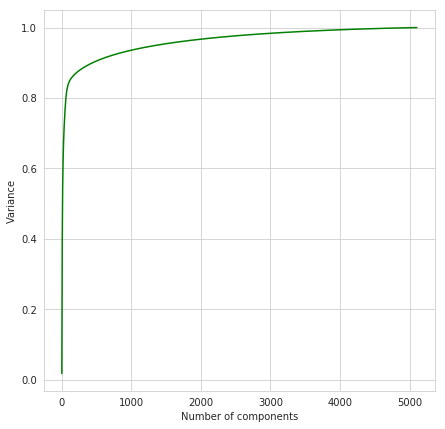

In [0]:
components = np.arange(1, trainingMergedData.shape[1]);
componentsRatio =svd.explained_variance_ratio_.cumsum()

print(componentsRatio);

plt.xlabel('Number of components');
plt.ylabel('Variance');
plt.plot(components, componentsRatio, color = 'green');

### Observations:
1. As you can see from above plot that with dimensions more than 450 90% of variance is retained. So the less number of dimensions to start with inorder to get good results would be 450.
2. At dimensions more than 1400 more than 95% of variance is retained.

<a id="classification_on_balanced_data_reduced_dimensions_using_support_vector_machine"></a>
<h3><font color="green">Classification using data with reduced dimensions by support vector machine</font></h3> 

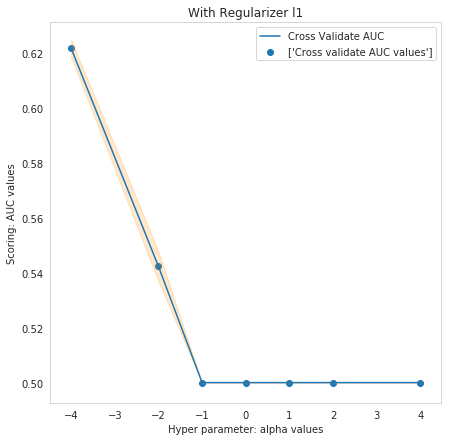

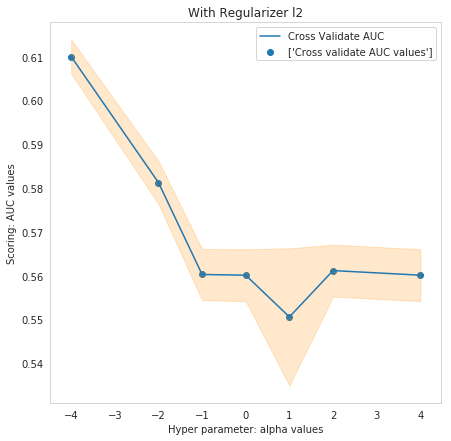

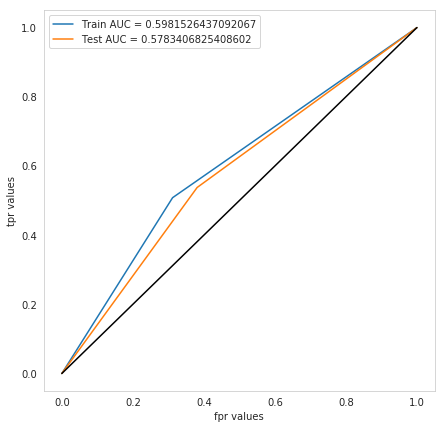

Results of analysis using data of dimensions 450 using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.5783406825408602
Confusion Matrix : 


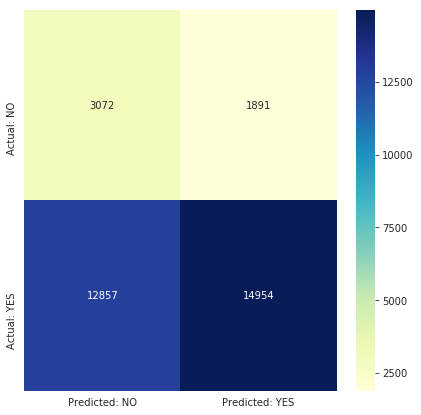

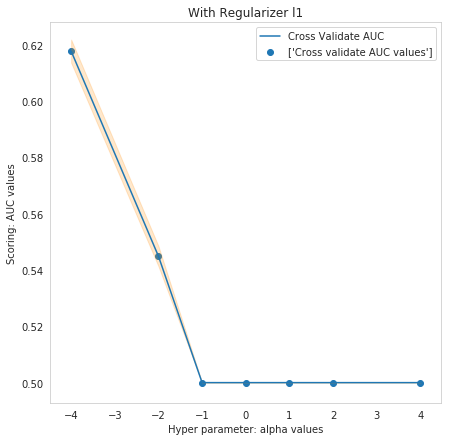

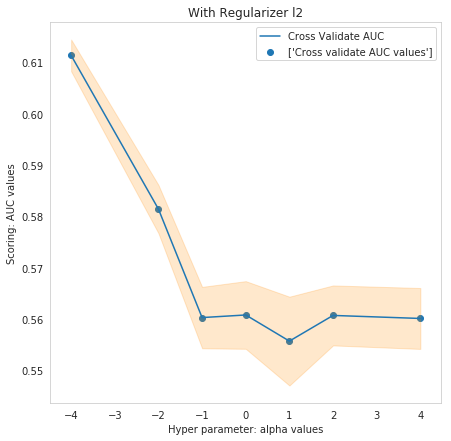

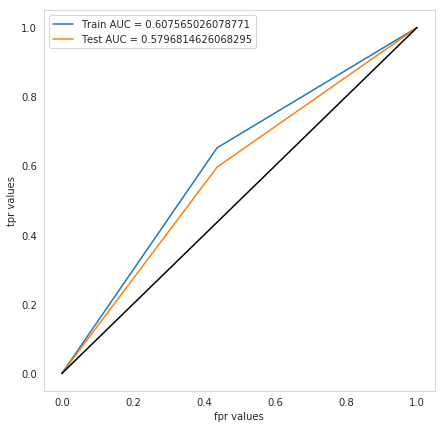

Results of analysis using data of dimensions 600 using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.5796814626068295
Confusion Matrix : 


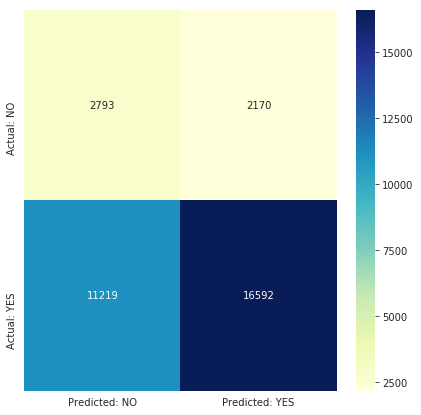

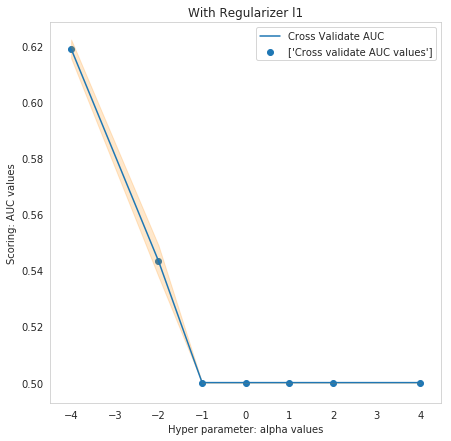

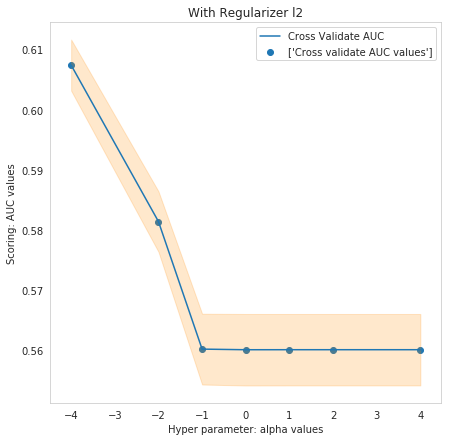

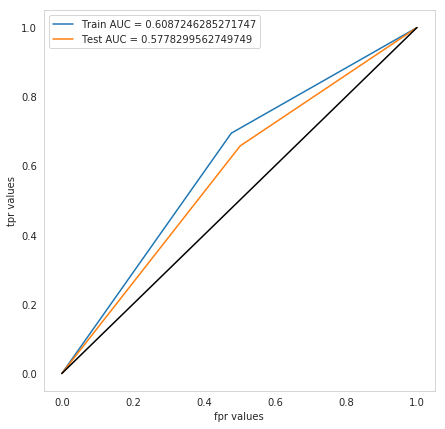

Results of analysis using data of dimensions 900 using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.5778299562749749
Confusion Matrix : 


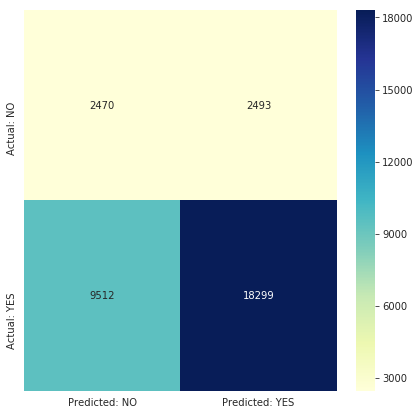

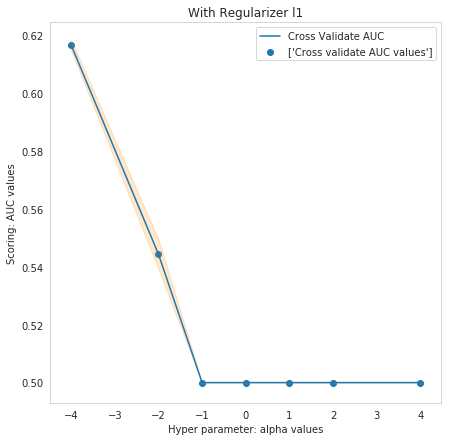

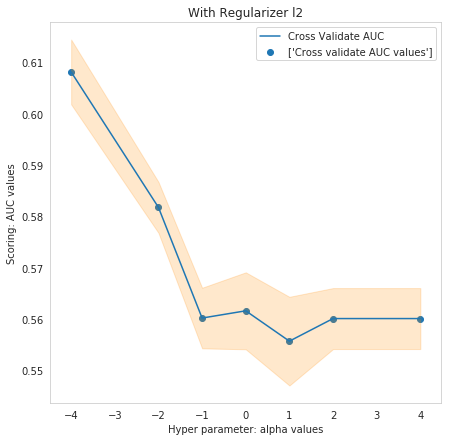

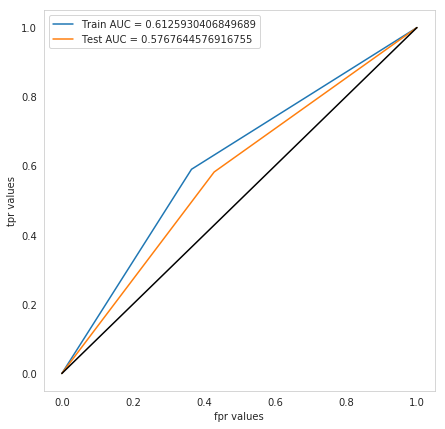

Results of analysis using data of dimensions 1200 using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.5767644576916755
Confusion Matrix : 


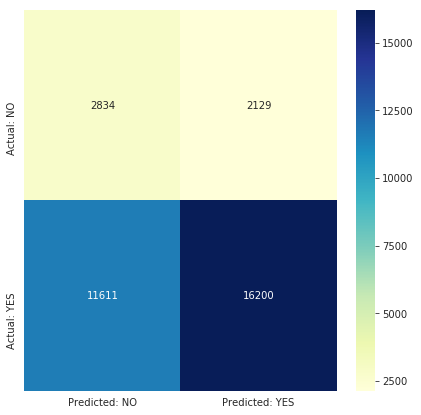

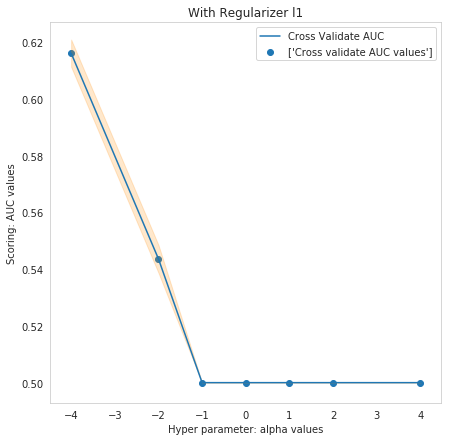

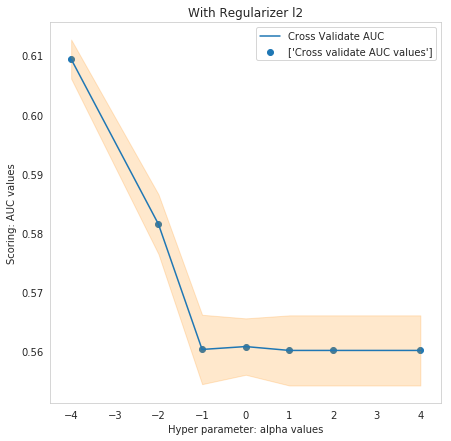

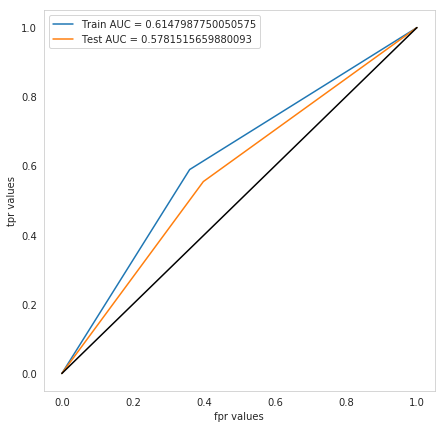

Results of analysis using data of dimensions 1400 using support vector machine classifier: 
Optimal Alpha value:  0.0001
Optimal Regularizer:  l1
AUC value of test data:  0.5781515659880093
Confusion Matrix : 


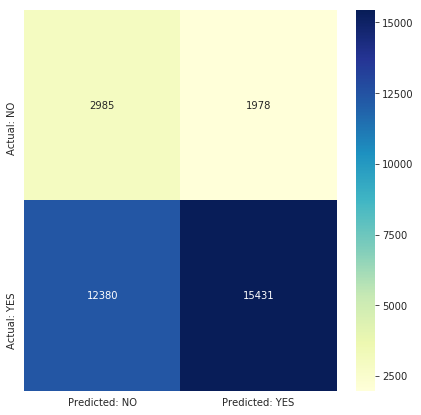

In [0]:
techniques = ['With Reduced Dimensions'];
n_componentsValues = [450, 600, 900, 1200, 1400];
for index, technique in enumerate(techniques):
  for n_components in n_componentsValues:
    trainingMergedData = hstack((categoriesVectorsSub,\
                             subCategoriesVectorsSub,\
                             teacherPrefixVectorsSub,\
                             schoolStateVectorsSub,\
                             projectGradeVectorsSub,\
                             priceStandardizedSub,\
                             previouslyPostedStandardizedSub,\
                             numberOfWordsInTitleStandardizedSub,\
                             numberOfWordsInEssayStandardizedSub,\
                             positiveSentimentScoreSub,\
                             negativeSentimentScoreSub,\
                             neutralSentimentScoreSub,\
                             compoundSentimentScoreSub,\
                             tfIdfEssayModelSub));
    svd = TruncatedSVD(n_components = n_components, random_state = 42);
    svd.fit(trainingMergedData);
    trainingMergedData = svd.transform(trainingMergedData);
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                      subCategoriesTransformedCrossValidateData,\
                                      teacherPrefixTransformedCrossValidateData,\
                                      schoolStateTransformedCrossValidateData,\
                                      projectGradeTransformedCrossValidateData,\
                                      priceTransformedCrossValidateData,\
                                      previouslyPostedTransformedCrossValidateData,\
                                      numberOfWordsInTitleTransformedCrossValidateData,\
                                      numberOfWordsInEssayTransformedCrossValidateData,\
                                      positiveSentimentScoreCrossValidateData,\
                                      negativeSentimentScoreCrossValidateData,\
                                      neutralSentimentScoreCrossValidateData,\
                                      compoundSentimentScoreCrossValidateData,\
                                      tfIdfEssayTransformedCrossValidateData));
    crossValidateMergedData = svd.transform(crossValidateMergedData);

    testMergedData = hstack((categoriesTransformedTestData,\
                             subCategoriesTransformedTestData,\
                             teacherPrefixTransformedTestData,\
                             schoolStateTransformedTestData,\
                             projectGradeTransformedTestData,\
                             priceTransformedTestData,\
                             previouslyPostedTransformedTestData,\
                             numberOfWordsInTitleTransformedTestData,\
                             numberOfWordsInEssayTransformedTestData,\
                             positiveSentimentScoreTestData,\
                             negativeSentimentScoreTestData,\
                             neutralSentimentScoreTestData,\
                             compoundSentimentScoreTestData,\
                            tfIdfEssayTransformedTestData));
    testMergedData = svd.transform(testMergedData);

    svmClassifier = linear_model.SGDClassifier(loss = 'hinge', class_weight = 'balanced');
    tunedParameters = {'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 10000], 'penalty': ['l1', 'l2']};
    classifier = GridSearchCV(svmClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_alpha'].data[:, None], classifier.cv_results_['param_penalty'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['alpha', 'penalty', 'mts', 'stdts']);
    testScoresDataFrame
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    testScoresDataFrame['logAlphaValues'] = [math.log10(x) for x in testScoresDataFrame['alpha']];
    
    plt.plot(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'], label = "Cross Validate AUC");
    plt.scatter(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'], label = ['Cross validate AUC values']);
    plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['logAlphaValues'].values, np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'].values - testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['stdts'].values, dtype = float),\
                           np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['mts'].values + testScoresDataFrame[testScoresDataFrame['penalty'] == 'l1']['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
    plt.xlabel('Hyper parameter: alpha values');
    plt.ylabel('Scoring: AUC values');
    plt.title("With Regularizer l1");
    plt.grid();
    plt.legend();
    plt.show();
    
    plt.plot(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'], label = "Cross Validate AUC");
    plt.scatter(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['logAlphaValues'], testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'], label = ['Cross validate AUC values']);
    plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['logAlphaValues'].values, np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'].values - testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['stdts'].values, dtype = float),\
                           np.array(testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['mts'].values + testScoresDataFrame[testScoresDataFrame['penalty'] == 'l2']['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
    plt.xlabel('Hyper parameter: alpha values');
    plt.ylabel('Scoring: AUC values');
    plt.title("With Regularizer l2");
    plt.grid();
    plt.legend();
    
    plt.show();
    
    optimalHypParamValue = classifier.best_params_['alpha'];
    optimalHypParam2Value = classifier.best_params_['penalty'];
    svmClassifier = linear_model.SGDClassifier(loss = 'hinge', class_weight = 'balanced', alpha = optimalHypParamValue, penalty = optimalHypParam2Value);
    svmClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = svmClassifier.predict(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining);
    predScoresTest = svmClassifier.predict(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest);
    
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();
    
    areaUnderRocValueTest = auc(fprTest, tprTest);
    
    print("Results of analysis using data of dimensions {} using support vector machine classifier: ".format(n_components));
    equalsBorder(40);
    print("Optimal Alpha value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Regularizer: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = svmClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="YlGnBu");
    plt.show();
    # Adding results to results dataframe
    supportVectorMachineResultsDataFrame = supportVectorMachineResultsDataFrame.append({'Vectorizer': technique, 'Model': 'SVM(SGD - hinge loss)', 'Hyper Parameter - alpha': optimalHypParamValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);

<h1>3. Conclusion</h1>

<a id="classification_using_support_vector_machine_results"></a>
<h3><font color="green">Summary of results of above classification using support vector machine</font></h3>

In [0]:
supportVectorMachineResultsDataFrame

,Vectorizer,Model,Hyper Parameter - alpha,AUC,Regularizer
0,Bag of Words,SVM(SGD - hinge loss),0.0100,0.6614,l2
1,Tf-Idf,SVM(SGD - hinge loss),0.0001,0.6602,l1
2,Word2Vec,SVM(SGD - hinge loss),0.0001,0.6437,l1
3,Tf-Idf Weighted Word2Vec,SVM(SGD - hinge loss),0.0001,0.5971,l1
4,Tf-Idf(450 dim),SVM(SGD - hinge loss),0.0001,0.5783,l1
5,Tf-Idf(600 dim),SVM(SGD - hinge loss),0.0001,0.5796,l1
6,Tf-Idf(900 dim),SVM(SGD - hinge loss),0.0001,0.5778,l1
7,Tf-Idf(1200 dim),SVM(SGD - hinge loss),0.0001,0.5767,l1
8,Tf-Idf(1400 dim),SVM(SGD - hinge loss),0.0001,0.5781,l1


<a id="classification_using_support_vector_machine_conclusions"></a>
<h3><font color="green">Conclusions of above analysis</font></h3>

1. From above analysis it seems that when data is balanced and text features are vectorized using bag of words the support vector machine is giving best results with auc value of 0.6614. The classification of negative points into negative points are also reasonable with this model but with other models it is kind of biased.
2. When classification is done using imbalanced data with reduced dimensions it is giving less auc values and a biased model(dumb model) that is classifying points incorrectly.
3. At last the good combination would be using balanced data with all categorical features, numerical features and text features vectorized with bag of words technique and hyper parameter value as 0.01.